# Deloi Aigbevboile - 260843

# Data Science Research Methods 
# Report 2: Physical Activity Detection

## Table of Content

### 1. Introduction
### 2. Data Gathering
### 3. Data Munging/Cleaning
3a. Heartrate
### 4. Exploratory Data Analysis (EDA)
4a. Analysing Attributes

4b. Heart Rate Analysis

4c. Angular Velocity Analysis

4d. Acceleration Analysis

4e. Temperature Analysis

4f. Correlation

### 5. Hypothesis Testing
5a. Hypothesis Test 1

5b. Hypothesis Test 2

### 6. Modelling
6a. Support Vector Classifier (SVC)

6b. Logistic Regression Model

6c. Random Forest Classifier

### 7. Applying Models

### 8. Conclusion

### 9. Reference





## 1. Introduction


There is an increasing recognition of the importance of physical health, and as a result, technology is evolving to meet the demand for tools that can monitor and track various aspects of health and fitness. Many companies have developed devices that can accurately measure and record physical activity in real time, as well as vital health readings like heart rate, blood pressure, and temperature. These devices offer a range of benefits to users, but the information they provide has the potential to be used for a wide variety of other applications as well.

The main goal of this project is to use data and analysis to inform the development of a hardware and/or software solution that can accurately track and classify physical activity in real time. The provided dataset includes data from 9 subjects performing 18 different activities while wearing 3 inertial measurement units and a heart rate monitor, with each row representing a single reading and 54 attributes. This report will specifically focus on the 12 protocol activities within the dataset. By gaining a deeper understanding of the data and identifying key trends and patterns, it is hoped that actionable insights can be derived that will aid in the development of a successful and effective solution.

This project will be carried out for in four main sections

* Data Gathering
* Data Munging or Cleaning
* Exploratory Data Analysis (EDA)
* Modelling

## 2. Data Gathering

In [34]:
# Importing necessary Libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import math
import os
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import scipy.stats as st
from scipy.stats import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from IPython.display import display

import io
from nbformat import read

In [2]:
# Reads in Subject Information file
def read_csv(m):
    df = pd.read_csv("subject_Information.csv")
    return df
sub_info = read_csv(0)
sub_info.shape # Displays the size of the data

(9, 8)

In [3]:
sub_info

,Subject ID,Sex,Age (years),Height (cm),Weight (kg),Resting HR (bpm),Max HR (bpm),Dominant Hand
0,101,Male,27,182,83,75,193,Right
1,102,Female,25,169,78,74,195,Right
2,103,Male,31,187,92,68,189,Right
3,104,Male,24,194,95,58,196,Right
4,105,Male,26,180,73,70,194,Right
5,106,Male,26,183,69,60,194,Right
6,107,Male,223,173,86,60,197,Right
7,108,Male,32,179,87,66,188,Left
8,109,Male,31,168,65,54,189,Right


The provided dataset for this project includes 9 text files in the .dat format, each containing data on activities performed by a single individual. The data was collected using 3 inertial measurement units (IMUs), a heart rate monitor, and a companion unit (Viliv S5 UMPC). Each row in the dataset has 54 attributes, with the first 3 columns containing information on the time stamp, activity ID, and heart rate. The remaining columns contain data on temperature, acceleration, angular velocity, magnetic field, and orientation from the IMUs on the hand, chest, and ankle. Columns 4-20 contain data from the IMU on the wrist, columns 21-37 contain data from the IMU on the chest, and columns 38-54 contain data from the IMU on the ankle.





In [4]:
# Read in the data from the PAMAP2 dataset

Data_file = ["Dataset/Protocol/subject101.dat",
             "Dataset/Protocol/subject102.dat",
             "Dataset/Protocol/subject103.dat",
             "Dataset/Protocol/subject104.dat",
             "Dataset/Protocol/subject105.dat",
             "Dataset/Protocol/subject106.dat",
             "Dataset/Protocol/subject107.dat",
             "Dataset/Protocol/subject108.dat",
             "Dataset/Protocol/subject109.dat"]

In [5]:
# Create subject IDs for each subject

Sub_ID = list(range(1,10))

# The columns in the separate files are arranged as below:
# Columns 1 to 3
Col_1_3 = ["timeStamp", "activityID", "heartRate"]

# Columns 4 to 20 contained data info from IMU sensors attached to subjects hands with the following data colums:
Col_4_20 = ["handTemp",
            "handAccel16g_1", "handAccel16g_2", "handAccel16g_3",
            "handAccel6g_1", "handAccel6g_2", "handAccel6g_3",
            "handGyro1", "handGyro2", "handGyro3",
            "handMagnet1", "handMagnet2", "handMagnet3",
            "handOri1", "handOri2", "handOri3", "handOri4"]


# Columns 21 to 37 contained data info from IMU sensors attached to the chest with the following data colums:
Col_21_37 = ["chestTemp",
            "chestAccel16g_1", "chestAccel16g_2", "chestAccel16g_3",
            "chestAccel6g_1", "chestAccel6g_2", "chestAccel6g_3",
            "chestGyro1", "chestGyro2", "chestGyro3",
            "chestMagnet1", "chestMagnet2", "chestMagnet3",
            "chestOri1", "chestOri2", "chestOri3", "chestOri4"]


# Columns 38 to 54 contained data info from IMU sensors attached to the ankles with the following data colums:
Col_38_54 = ["ankleTemp",
            "ankleAccel16g_1", "ankleAccel16g_2", "ankleAccel16g_3",
            "ankleAccel6g_1", "ankleAccel6g_2", "ankleAccel6g_3",
            "ankleGyro1", "ankleGyro2", "ankleGyro3",
            "ankleMagnet1", "ankleMagnet2", "ankleMagnet3",
            "ankleOri1", "ankleOri2", "ankleOri3", "ankleOri4"]


# Create a dictionary of Activity IDs with Activity ID and Activity name been the dictinary keys and values respectively
Dict_Activity_ID = {0: "other",
                    1: "lying",
                    2: "sitting",
                    3: "standing",
                    4: "walking",
                    5: "running",
                    6: "cycling",
                    7: "Nordic walking",
                    9: "watching TV",
                    10: "computer work",
                    11: "car driving",
                    12: "ascending stairs",
                    13: "descending stairs",
                    16: "vacuum cleaning",
                    17: "ironing",
                    18: "folding laundry",
                    19: "house cleaning",
                    20: "playing soccer",
                    24: "rope jumping"}


# Concatenates the different columns 
columns = Col_1_3 + Col_4_20 + Col_21_37 + Col_38_54

# Confirm column length
len(columns)

54

In [6]:
# Creates a single dataframe PAMAP2 from the separate files
PAMAP2 = pd.DataFrame()
for i in Data_file:
    PAMAP2_Data = pd.read_table(i, header = None, sep = "\s+")
    
    # Sets the dataframe columns to the columns in the initial files
    PAMAP2_Data.columns = columns
    
  
    # Adds the Subject IDs tp rows to relate individual subject to rows.
    PAMAP2_Data["subjectID"] = int(i[-5]) 
    PAMAP2 = PAMAP2.append(PAMAP2_Data, ignore_index=True)
    
#pamap.reset_index(drop=True, inplace=True)

# Display first 5 rwos of the dataframe along with it's shape.
print(PAMAP2.shape)
PAMAP2.head()

(2872533, 55)


,timeStamp,activityID,heartRate,handTemp,handAccel16g_1,handAccel16g_2,handAccel16g_3,handAccel6g_1,handAccel6g_2,handAccel6g_3,...,ankleGyro2,ankleGyro3,ankleMagnet1,ankleMagnet2,ankleMagnet3,ankleOri1,ankleOri2,ankleOri3,ankleOri4,subjectID
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


## 3. Data Munging/Cleaning

According to the information provided in the readme.pdf file, some data from the dataset should be excluded from the analysis. Specifically, any rows with an activity ID of 0 should be removed, as well as any acceleration data collected with a scale of ±6g, as the accelerometer was not accurately calibrated for this scale. Additionally, data on orientation and magnetic fields should be excluded, as the focus of the analysis is on determining the activity being performed rather than the direction in which it is performed. These data points should be removed in order to ensure that the analysis is accurate and focused on the relevant information.


In [7]:
PAMAP2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872533 entries, 0 to 2872532
Data columns (total 55 columns):
 #   Column           Dtype  
---  ------           -----  
 0   timeStamp        float64
 1   activityID       int64  
 2   heartRate        float64
 3   handTemp         float64
 4   handAccel16g_1   float64
 5   handAccel16g_2   float64
 6   handAccel16g_3   float64
 7   handAccel6g_1    float64
 8   handAccel6g_2    float64
 9   handAccel6g_3    float64
 10  handGyro1        float64
 11  handGyro2        float64
 12  handGyro3        float64
 13  handMagnet1      float64
 14  handMagnet2      float64
 15  handMagnet3      float64
 16  handOri1         float64
 17  handOri2         float64
 18  handOri3         float64
 19  handOri4         float64
 20  chestTemp        float64
 21  chestAccel16g_1  float64
 22  chestAccel16g_2  float64
 23  chestAccel16g_3  float64
 24  chestAccel6g_1   float64
 25  chestAccel6g_2   float64
 26  chestAccel6g_3   float64
 27  chestGyro1  

In [8]:
# Removes rows with activity ID == 0
PAMAP2 = PAMAP2.drop(PAMAP2[PAMAP2.activityID == 0].index)

'''Removes columns with data on orientation and accelaration of ±6g scale 
for the chest, ankles, and hand, based on earlier recommendation'''

PAMAP2 = PAMAP2.drop(["handOri1", "handOri2", "handOri3", "handOri4",
                    "chestOri1", "chestOri2", "chestOri3", "chestOri4",
                    "ankleOri1", "ankleOri2", "ankleOri3", "ankleOri4",
                    "handAccel6g_1", "handAccel6g_2", "handAccel6g_3",
                    "chestAccel6g_1", "chestAccel6g_2", "chestAccel6g_3",
                    "ankleAccel6g_1", "ankleAccel6g_2", "ankleAccel6g_3",
                    "handMagnet1", "handMagnet2", "handMagnet3",
                    "chestMagnet1", "chestMagnet2", "chestMagnet3",
                    "ankleMagnet1", "ankleMagnet2", "ankleMagnet3"], axis = 1)

PAMAP2.shape

(1942872, 25)

In [9]:
PAMAP2.isnull().sum() # Displays the sum of the null values per columns

timeStamp                0
activityID               0
heartRate          1765464
handTemp             11124
handAccel16g_1       11124
handAccel16g_2       11124
handAccel16g_3       11124
handGyro1            11124
handGyro2            11124
handGyro3            11124
chestTemp             2420
chestAccel16g_1       2420
chestAccel16g_2       2420
chestAccel16g_3       2420
chestGyro1            2420
chestGyro2            2420
chestGyro3            2420
ankleTemp             8507
ankleAccel16g_1       8507
ankleAccel16g_2       8507
ankleAccel16g_3       8507
ankleGyro1            8507
ankleGyro2            8507
ankleGyro3            8507
subjectID                0
dtype: int64

In [10]:
PAMAP2.isnull().sum(axis = 1) # Displays the sum of the null values per rows

2928       1
2929       1
2930       1
2931       1
2932       0
          ..
2872015    1
2872016    1
2872017    1
2872018    0
2872019    1
Length: 1942872, dtype: int64

### 3a. Heartrate


In [11]:
# Removes columns without values for heartRate
PAMAP2 = PAMAP2.dropna(subset = ["heartRate"])

PAMAP2.shape

(177408, 25)

In [12]:
PAMAP2

,timeStamp,activityID,heartRate,handTemp,handAccel16g_1,handAccel16g_2,handAccel16g_3,handGyro1,handGyro2,handGyro3,...,chestGyro2,chestGyro3,ankleTemp,ankleAccel16g_1,ankleAccel16g_2,ankleAccel16g_3,ankleGyro1,ankleGyro2,ankleGyro3,subjectID
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,...,-0.013352,-0.039315,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,1
2943,37.81,1,100.0,30.375,2.24615,7.48180,5.55219,-0.431227,0.002685,-0.062964,...,-0.037321,-0.033805,30.75,9.73536,-2.03681,0.019118,0.005819,-0.017912,0.015243,1
2954,37.92,1,100.0,30.375,2.30000,7.10681,6.09309,0.075692,-0.030792,0.005246,...,-0.055878,-0.044714,30.75,9.73745,-1.84729,0.056553,0.015376,-0.011798,0.011387,1
2965,38.03,1,100.0,30.375,2.49455,7.52335,6.17157,-0.259058,-0.267895,-0.038533,...,0.020297,-0.012148,30.75,9.58444,-1.84538,-0.060796,-0.012672,-0.009233,0.005823,1
2976,38.14,1,101.0,30.375,2.71654,8.30596,4.78671,0.377115,-0.023688,-0.020670,...,0.001881,-0.058687,30.75,9.69963,-1.92299,0.056635,0.050959,-0.042562,-0.009289,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871975,94.66,24,162.0,25.125,4.78601,6.75444,7.05521,-0.092524,-0.060432,-0.111549,...,0.069814,-0.013575,31.50,9.59830,-2.13225,-2.142710,-0.022888,0.020064,-0.022287,9
2871986,94.77,24,162.0,25.125,4.34732,6.90337,6.35537,-0.303158,-0.255639,-0.230901,...,-0.151611,-0.049037,31.50,9.25937,-2.31964,-2.183610,-0.002293,-0.004692,0.009044,9
2871997,94.88,24,162.0,25.125,4.70704,6.59291,5.89995,0.064261,-0.406750,0.055630,...,-0.228297,0.017236,31.50,9.29629,-2.20565,-2.222530,-0.029348,-0.020501,-0.036864,9
2872007,94.98,24,162.0,25.125,4.81452,6.51482,5.74788,-0.191101,-0.290927,0.172182,...,-0.212727,0.085241,31.50,9.48531,-2.05528,-2.182940,-0.036682,-0.011895,-0.017897,9


In [13]:
PAMAP2 = PAMAP2.apply(pd.to_numeric, errors = "coerce") # converts Non_numeric data to NAN

In [14]:
PAMAP2.head(11)

,timeStamp,activityID,heartRate,handTemp,handAccel16g_1,handAccel16g_2,handAccel16g_3,handGyro1,handGyro2,handGyro3,...,chestGyro2,chestGyro3,ankleTemp,ankleAccel16g_1,ankleAccel16g_2,ankleAccel16g_3,ankleGyro1,ankleGyro2,ankleGyro3,subjectID
2932,37.70,1,100.0,30.375,2.301060,7.25857,6.09259,-0.069961,-0.018328,0.004582,...,-0.013352,-0.039315,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,1
2943,37.81,1,100.0,30.375,2.246150,7.48180,5.55219,-0.431227,0.002685,-0.062964,...,-0.037321,-0.033805,30.75,9.73536,-2.03681,0.019118,0.005819,-0.017912,0.015243,1
2954,37.92,1,100.0,30.375,2.300000,7.10681,6.09309,0.075692,-0.030792,0.005246,...,-0.055878,-0.044714,30.75,9.73745,-1.84729,0.056553,0.015376,-0.011798,0.011387,1
2965,38.03,1,100.0,30.375,2.494550,7.52335,6.17157,-0.259058,-0.267895,-0.038533,...,0.020297,-0.012148,30.75,9.58444,-1.84538,-0.060796,-0.012672,-0.009233,0.005823,1
2976,38.14,1,101.0,30.375,2.716540,8.30596,4.78671,0.377115,-0.023688,-0.020670,...,0.001881,-0.058687,30.75,9.69963,-1.92299,0.056635,0.050959,-0.042562,-0.009289,1
2987,38.25,1,101.0,30.375,2.549540,7.63122,5.55623,-0.487667,-0.019958,-0.089500,...,-0.001223,0.004039,30.75,9.66059,-1.80820,-0.021657,0.005473,-0.003154,0.025621,1
2998,38.36,1,101.0,30.375,2.824070,6.14490,5.06502,-0.781563,0.198873,-0.213285,...,-0.014321,-0.005337,30.75,9.69872,-1.88470,0.017799,0.011453,-0.000398,0.001243,1
3009,38.47,1,101.0,30.375,2.736260,7.94195,6.52017,-0.472414,0.279868,0.036527,...,0.023715,-0.077538,30.75,9.58774,-1.84634,0.055012,0.003170,-0.019596,0.001829,1
3020,38.58,1,101.0,30.375,2.388940,7.48830,6.40103,0.358279,1.046610,0.346204,...,-0.021701,-0.034385,30.75,9.80020,-1.84423,-0.367308,0.008459,-0.069819,0.032094,1
3031,38.69,1,101.0,30.375,1.813200,6.85639,7.35672,0.360442,1.287300,0.129226,...,-0.010910,-0.144027,30.75,9.54603,-2.03498,-0.060014,-0.014122,-0.027863,0.006432,1


To address any remaining null values in the dataset, interpolation can be used to estimate the values of these missing data points based on the known data points around them. Interpolation is a mathematical method that involves estimating the values of unknown data points by fitting them into the pattern of the existing, known data points. By using interpolation to populate the null values in the dataset, it may be possible to more accurately represent the underlying data and reduce the impact of missing values on the analysis.

In [15]:
PAMAP2 = PAMAP2.interpolate() # Interpolates the data
PAMAP2.isnull().sum()

timeStamp          0
activityID         0
heartRate          0
handTemp           0
handAccel16g_1     0
handAccel16g_2     0
handAccel16g_3     0
handGyro1          0
handGyro2          0
handGyro3          0
chestTemp          0
chestAccel16g_1    0
chestAccel16g_2    0
chestAccel16g_3    0
chestGyro1         0
chestGyro2         0
chestGyro3         0
ankleTemp          0
ankleAccel16g_1    0
ankleAccel16g_2    0
ankleAccel16g_3    0
ankleGyro1         0
ankleGyro2         0
ankleGyro3         0
subjectID          0
dtype: int64

It may be beneficial to calculate the resultant acceleration and angular velocity for each of the hand, chest, and ankle locations, and create new columns for these values while dropping the individual acceleration and angular velocity measurements for each axis. This can help simplify the data and make it easier to analyze. Additionally, the magnetic field measurement may not be particularly useful for detecting which activity a person is performing, as none of the activities included in the provided dataset are expected to significantly affect the magnetic field. Instead, the magnetic field measurement is likely to depend more on the location where the activity is being performed (e.g. the Earth's magnetic field) rather than the specific activity itself. As a result, it is appropriate to exclude the magnetic field measurement from the analysis.

The resultant acceleration is given by

* $a_{(res)} = \sqrt {a_x^2 \, +\, a_y^2 \,+\, a_z^2}$

and the resultant angular velocity is given by

* $\omega_{(res)} = \sqrt {\omega_x^2 \, +\, \omega_y^2 \,+\, \omega_z^2}$

In [16]:
# Calculates the acceleration due to gravity and angular velocity for the hand, chest and ankles.

PAMAP2["handAccel"] = np.sqrt(np.power(PAMAP2.handAccel16g_1,2)+np.power(PAMAP2.handAccel16g_2,2)
                           +np.power(PAMAP2.handAccel16g_3,2))
PAMAP2["chestAccel"] = np.sqrt(np.power(PAMAP2.chestAccel16g_1,2)+np.power(PAMAP2.chestAccel16g_2,2)
                            +np.power(PAMAP2.chestAccel16g_3,2))
PAMAP2["ankleAccel"] = np.sqrt(np.power(PAMAP2.ankleAccel16g_1,2)+np.power(PAMAP2.ankleAccel16g_2,2)
                            +np.power(PAMAP2.ankleAccel16g_3,2))
PAMAP2["handGyro"] = np.sqrt(np.power(PAMAP2.handGyro1,2)+np.power(PAMAP2.handGyro2,2)
                           +np.power(PAMAP2.handGyro3,2))
PAMAP2["chestGyro"] = np.sqrt(np.power(PAMAP2.chestGyro1,2)+np.power(PAMAP2.chestGyro2,2)
                            +np.power(PAMAP2.chestGyro3,2))
PAMAP2["ankleGyro"] = np.sqrt(np.power(PAMAP2.ankleGyro1,2)+np.power(PAMAP2.ankleGyro2,2)
                            +np.power(PAMAP2.ankleGyro3,2))

# Drops individual angular velocity and acceleration due to gravity measurements for each axis 

PAMAP2 = PAMAP2.drop(["handAccel16g_1", "handAccel16g_2", "handAccel16g_3",
                    "chestAccel16g_1", "chestAccel16g_2", "chestAccel16g_3",
                    "ankleAccel16g_1", "ankleAccel16g_2", "ankleAccel16g_3",
                    "handGyro1", "handGyro2", "handGyro3",
                    "chestGyro1", "chestGyro2", "chestGyro3",
                    "ankleGyro1", "ankleGyro2", "ankleGyro3"
                    ], axis = 1)
PAMAP2.shape

(177408, 13)

In [17]:
# Displaying a list of all activities
Activity = PAMAP2.heartRate.groupby(PAMAP2.activityID).mean()
Activity.index = Activity.index.map(Dict_Activity_ID)
Activities = list(Activity.index)
print(Activities)

['lying', 'sitting', 'standing', 'walking', 'running', 'cycling', 'Nordic walking', 'ascending stairs', 'descending stairs', 'vacuum cleaning', 'ironing', 'rope jumping']


There is a risk of mislabeling data during the period when an individual is transitioning between one activity to another, and it can also take some time for body temperature and heart rate to increase after starting an activity. To address these issues, it may be helpful to remove any data that is within 3 seconds of the transition between activities. This can help reduce the chance of mislabeling and better reflect the true nature of the activity being performed.

In [18]:
freq = 3 # Time taken to transition from one activity to another

# Cumulates the sum after counting change in activity or subject
PAMAP2['activity_Block'] = ((PAMAP2['activityID'].shift(1) != PAMAP2['activityID']) &
                            (PAMAP2['subjectID'].shift(1) != PAMAP2['subjectID'])).astype(int).cumsum()
Total_Blocks = PAMAP2['activity_Block'].max() #for the total number of change

Drop_activityBlock = []

# For every iteration where the above change occurs, 30 rows are added indicating 3 seconds of change
for i in range(1, Total_Blocks+1):
    Drop_activityBlock += list(PAMAP2[PAMAP2['activity_Block']==i].head(10 * freq).index)
    Drop_activityBlock += list(PAMAP2[PAMAP2['activity_Block']==i].tail(10 * freq).index)

# Drops the rows in the Drop_aactivityBlock list, corresponding to removing 3 seconds in change of activity    
PAMAPII = PAMAP2.drop(Drop_activityBlock)
PAMAPII.drop(['activity_Block'], axis = 1, inplace  = True)
PAMAPII.reset_index(drop = True, inplace = True)
PAMAPII

,timeStamp,activityID,heartRate,handTemp,chestTemp,ankleTemp,subjectID,handAccel,chestAccel,ankleAccel,handGyro,chestGyro,ankleGyro
0,40.98,1,102.0,30.4375,32.250,30.8125,1,9.056688,9.968677,9.741700,2.142758,0.040704,0.050703
1,41.09,1,102.0,30.4375,32.250,30.8125,1,9.074636,9.812929,9.795796,1.459681,0.040971,0.026422
2,41.20,1,102.0,30.4375,32.250,30.8125,1,8.682039,9.724070,9.756396,1.961666,0.098319,0.065049
3,41.31,1,102.0,30.4375,32.250,30.8125,1,8.393024,10.379334,9.801121,0.743370,0.181950,0.017677
4,41.42,1,102.0,30.4375,32.250,30.8125,1,10.257664,9.764158,9.924993,0.407577,0.048192,0.063392
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176923,91.38,24,161.0,25.1250,32.375,31.5000,9,23.147470,7.390457,7.761788,3.130471,1.377341,3.689025
176924,91.48,24,161.0,25.1250,32.375,31.5000,9,11.713568,1.322387,4.358454,1.782892,0.697051,1.808853
176925,91.59,24,161.0,25.1250,32.375,31.5000,9,4.302528,2.625772,10.184422,1.396300,0.647458,2.993932
176926,91.70,24,161.0,25.1250,32.375,31.5000,9,14.954219,24.121115,22.500078,1.851810,1.834241,3.240617


It is often helpful to split the dataset into two separate parts, one for exploratory data analysis and another for hypothesis testing. This can allow for more thorough investigation of the data and identify trends and patterns through exploratory data analysis, and then use the separate dataset for hypothesis testing to validate and confirm observations. By dividing the dataset in this way, one can more effectively use the data to gain insights and draw conclusions about the activity being monitored.

In [19]:
# Splits the dataset into 2, Training dataset and Test dataset
PAMAP2_Train = PAMAPII.sample(frac=0.8, random_state = 1)
PAMAP2_Test = PAMAPII.drop(PAMAP2_Train.index)

In [20]:
# Display brief info on the Training dataset
display(PAMAP2_Train.head())
display(PAMAP2_Train.describe())

,timeStamp,activityID,heartRate,handTemp,chestTemp,ankleTemp,subjectID,handAccel,chestAccel,ankleAccel,handGyro,chestGyro,ankleGyro
64965,383.45,2,96.0,32.8750,35.0000,33.8125,4,9.580015,9.956888,9.917754,0.030922,0.070092,0.099597
133066,275.95,1,62.0,31.1250,33.9375,30.8750,7,9.556603,9.522177,9.944637,0.027498,0.041789,0.023383
50499,670.26,2,71.0,31.9375,34.9375,32.8750,3,9.657688,9.826882,9.736006,0.043020,0.015995,0.019495
36312,2538.51,13,158.0,32.1875,36.7500,34.8125,2,5.524296,9.917450,12.277984,2.909403,1.469836,3.532462
87682,607.24,2,78.0,35.0000,36.9375,34.1875,5,9.512529,9.811270,10.136053,0.036162,0.049585,0.029530


,timeStamp,activityID,heartRate,handTemp,chestTemp,ankleTemp,subjectID,handAccel,chestAccel,ankleAccel,handGyro,chestGyro,ankleGyro
count,141542.000000,141542.000000,141542.000000,141542.000000,141542.000000,141542.000000,141542.000000,141542.000000,141542.000000,141542.000000,141542.000000,141542.000000,141542.000000
mean,1705.353132,8.078069,107.442992,32.754918,36.182388,33.714160,4.565867,10.998670,10.195786,12.394044,1.514311,0.521709,1.430214
std,1091.733301,6.160636,26.953910,1.787939,1.490562,1.089145,2.335511,5.757375,3.856242,7.773492,1.710287,0.593302,1.911992
min,31.220000,1.000000,57.000000,24.875000,31.937500,30.000000,1.000000,0.321264,0.175333,0.246706,0.001186,0.001402,0.000579
25%,745.262500,3.000000,86.000000,31.687500,35.187500,33.000000,2.000000,9.445129,9.469206,9.859032,0.169856,0.096234,0.058399
50%,1480.025000,6.000000,104.000000,33.125000,36.437500,34.062500,5.000000,9.800762,9.830651,10.045391,0.989127,0.368904,0.541193
75%,2663.185000,13.000000,124.000000,34.062500,37.437500,34.500000,7.000000,11.287384,10.404568,11.734422,2.245580,0.706841,2.139889
max,4242.250000,24.000000,202.000000,35.500000,38.562500,35.437500,9.000000,178.922859,127.143562,236.787687,19.163110,15.775153,14.580009


In [21]:
# Display brief info on the Test dataset
display(PAMAP2_Test.head())
display(PAMAP2_Test.describe())

,timeStamp,activityID,heartRate,handTemp,chestTemp,ankleTemp,subjectID,handAccel,chestAccel,ankleAccel,handGyro,chestGyro,ankleGyro
0,40.98,1,102.0,30.4375,32.25,30.8125,1,9.056688,9.968677,9.741700,2.142758,0.040704,0.050703
5,41.53,1,102.0,30.4375,32.25,30.8125,1,10.704409,9.951466,9.868196,0.362255,0.032952,0.045532
7,41.75,1,102.0,30.4375,32.25,30.8125,1,9.071018,9.795294,9.871373,1.098319,0.158417,0.068837
9,41.97,1,102.0,30.4375,32.25,30.8125,1,10.100539,9.874575,9.905548,0.253313,0.140078,0.047960
16,42.73,1,102.0,30.4375,32.25,30.8125,1,9.063419,9.786393,9.873769,1.015309,0.141251,0.039952


,timeStamp,activityID,heartRate,handTemp,chestTemp,ankleTemp,subjectID,handAccel,chestAccel,ankleAccel,handGyro,chestGyro,ankleGyro
count,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000,35386.000000
mean,1702.238083,8.089810,107.334228,32.763329,36.191056,33.720447,4.557537,10.964674,10.182348,12.439664,1.516034,0.516908,1.428608
std,1088.414027,6.164755,26.871483,1.791314,1.493815,1.089873,2.319885,5.580929,3.782383,7.963236,1.724975,0.584415,1.907219
min,31.440000,1.000000,57.000000,24.875000,31.937500,30.000000,1.000000,0.278204,0.296546,0.722588,0.002115,0.001539,0.002142
25%,749.580000,3.000000,86.000000,31.687500,35.187500,33.000000,2.000000,9.442601,9.471120,9.861184,0.176000,0.096867,0.059001
50%,1480.845000,6.000000,104.000000,33.187500,36.437500,34.062500,5.000000,9.802033,9.827464,10.044179,0.974790,0.368039,0.531963
75%,2653.937500,13.000000,124.000000,34.062500,37.437500,34.500000,7.000000,11.290571,10.386467,11.734139,2.226007,0.702339,2.134510
max,4242.360000,24.000000,202.000000,35.500000,38.562500,35.437500,9.000000,163.686263,101.502202,197.701664,18.043817,10.256276,14.290369


## 4. Exploratory Data Analysis(EDA)

In [22]:
PAMAP2_Train


,timeStamp,activityID,heartRate,handTemp,chestTemp,ankleTemp,subjectID,handAccel,chestAccel,ankleAccel,handGyro,chestGyro,ankleGyro
64965,383.45,2,96.0,32.8750,35.0000,33.8125,4,9.580015,9.956888,9.917754,0.030922,0.070092,0.099597
133066,275.95,1,62.0,31.1250,33.9375,30.8750,7,9.556603,9.522177,9.944637,0.027498,0.041789,0.023383
50499,670.26,2,71.0,31.9375,34.9375,32.8750,3,9.657688,9.826882,9.736006,0.043020,0.015995,0.019495
36312,2538.51,13,158.0,32.1875,36.7500,34.8125,2,5.524296,9.917450,12.277984,2.909403,1.469836,3.532462
87682,607.24,2,78.0,35.0000,36.9375,34.1875,5,9.512529,9.811270,10.136053,0.036162,0.049585,0.029530
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81755,2999.71,6,104.0,28.8750,34.1250,32.7500,4,10.403164,10.182145,9.990107,0.222461,0.210459,0.015334
49056,512.43,2,79.0,31.6875,34.5000,32.4375,3,9.804038,9.718838,10.088171,0.023511,0.021462,0.042365
34053,1761.62,12,113.0,34.2500,38.1250,35.3750,2,14.522414,14.343887,14.189065,3.985523,0.645865,1.267635
39516,3080.58,4,125.0,31.0000,35.9375,34.2500,2,8.329785,13.664645,16.963570,2.245227,0.557935,3.754023


In [23]:
PAMAP2_Train.describe()

,timeStamp,activityID,heartRate,handTemp,chestTemp,ankleTemp,subjectID,handAccel,chestAccel,ankleAccel,handGyro,chestGyro,ankleGyro
count,141542.000000,141542.000000,141542.000000,141542.000000,141542.000000,141542.000000,141542.000000,141542.000000,141542.000000,141542.000000,141542.000000,141542.000000,141542.000000
mean,1705.353132,8.078069,107.442992,32.754918,36.182388,33.714160,4.565867,10.998670,10.195786,12.394044,1.514311,0.521709,1.430214
std,1091.733301,6.160636,26.953910,1.787939,1.490562,1.089145,2.335511,5.757375,3.856242,7.773492,1.710287,0.593302,1.911992
min,31.220000,1.000000,57.000000,24.875000,31.937500,30.000000,1.000000,0.321264,0.175333,0.246706,0.001186,0.001402,0.000579
25%,745.262500,3.000000,86.000000,31.687500,35.187500,33.000000,2.000000,9.445129,9.469206,9.859032,0.169856,0.096234,0.058399
50%,1480.025000,6.000000,104.000000,33.125000,36.437500,34.062500,5.000000,9.800762,9.830651,10.045391,0.989127,0.368904,0.541193
75%,2663.185000,13.000000,124.000000,34.062500,37.437500,34.500000,7.000000,11.287384,10.404568,11.734422,2.245580,0.706841,2.139889
max,4242.250000,24.000000,202.000000,35.500000,38.562500,35.437500,9.000000,178.922859,127.143562,236.787687,19.163110,15.775153,14.580009


From the description of the train data, the mean Heart Rate is nearly 107/𝑚𝑖𝑛 and the maximum heart rate is around  202/𝑚𝑖𝑛. The maximum temperature is recorded in the chest at  38.5∘𝐶 among hand chest and ankle. The maximum mean acceleration is observed at the ankle at 12.3𝑚2/𝑠𝑒𝑐 and mean angular velocity is maximum in hand at 1.51𝑟𝑎𝑑/𝑠𝑒𝑐 

### 4a. Analysing Attributes

In [24]:
# Checking Average attributes of activities per individual

avg_att = PAMAP2_Train.pivot_table(index = 'subjectID') # Generates a pivot table
avg_att1 =avg_att.drop(["activityID", "timeStamp"],axis = 1)
avg_att1

,ankleAccel,ankleGyro,ankleTemp,chestAccel,chestGyro,chestTemp,handAccel,handGyro,handTemp,heartRate
subjectID,,,,,,,,,,
1,12.624046,1.403271,33.671981,10.300998,0.578750,35.243829,11.186776,1.686393,32.428764,122.265904
2,12.155569,1.528108,34.259804,10.211665,0.597007,36.335042,10.792688,1.831397,32.336779,109.499038
3,11.758687,1.001631,33.532647,9.940575,0.395620,35.803051,10.693953,1.479415,31.897511,94.976149
4,11.585605,1.164030,33.582833,9.987646,0.453862,35.129619,10.284627,1.185855,31.915064,109.324509
5,12.854235,1.604671,34.203775,10.324771,0.548061,37.445264,11.124634,1.511872,34.769862,108.457514
6,12.555918,1.566645,34.721820,10.194888,0.613439,35.832869,11.984857,1.689684,32.296291,103.050814
7,12.436443,1.438416,32.237760,10.018318,0.409568,36.771466,10.380196,1.035883,32.952782,96.232524
8,12.748121,1.538950,33.347273,10.409897,0.507769,36.705286,11.270247,1.568034,33.156170,109.880289
9,18.177960,2.308999,31.421104,12.198888,1.061613,32.231923,14.128173,3.145782,25.049748,148.051570


As seen from the table above, subject 9 had the highest readings in acceleration, angular velocity and heart rate, and the lowest reading in the temperature data. This can be explained by the fact that subject 9 only performed one protocol activity(rope jumping). If rope jumping alone was considered for every other subjet that participated, then the values would be within a close range to each other.

In [25]:
#Checking the mean attributes reading from Rope jumping per subject
Avg_activity = PAMAP2_Train.pivot_table(index = "activityID")#pivoting table wrt the activity id
Avg_activity.index  = Avg_activity.index.map(Dict_Activity_ID)
Avg_activityI=Avg_activity.drop(["subjectID", "timeStamp"],axis = 1)
Avg_activityI

,ankleAccel,ankleGyro,ankleTemp,chestAccel,chestGyro,chestTemp,handAccel,handGyro,handTemp,heartRate
activityID,,,,,,,,,,
lying,10.063273,0.089825,32.983944,9.585453,0.092085,35.094756,9.723339,0.148175,32.733930,75.317124
sitting,9.970251,0.094388,33.637612,9.818425,0.115431,35.828307,9.757048,0.242027,33.264811,80.001328
standing,9.955876,0.112962,33.898784,9.838570,0.159446,36.167335,9.777020,0.374943,33.640199,88.542676
walking,14.852715,2.955342,33.837993,10.112856,0.515398,37.005664,11.262361,2.738118,32.301010,112.793644
running,21.553434,4.180246,33.140568,12.253916,1.673480,34.388959,20.660841,4.114642,30.809981,156.739321
cycling,10.651271,1.218371,33.175696,10.212344,0.562398,35.734077,10.672412,0.800456,31.017822,124.816929
Nordic walking,15.473672,3.116361,33.441676,10.226605,0.562991,36.147357,11.057353,2.107089,31.527760,123.761233
ascending stairs,12.829763,1.914081,34.178744,10.163509,0.855923,37.047956,10.669985,2.103012,33.524000,129.761787
descending stairs,14.937457,2.673018,34.172223,10.167135,0.886974,37.021110,10.358837,1.804472,33.324216,129.147308


Again, the main take away from this table is that the all the sensor data except temperature is maximum for the activity rope jumping. Except acceleration of the ankle and temperature, all the sensor data is the least for the activity lying.

### 4b. Heart Rate Analysis

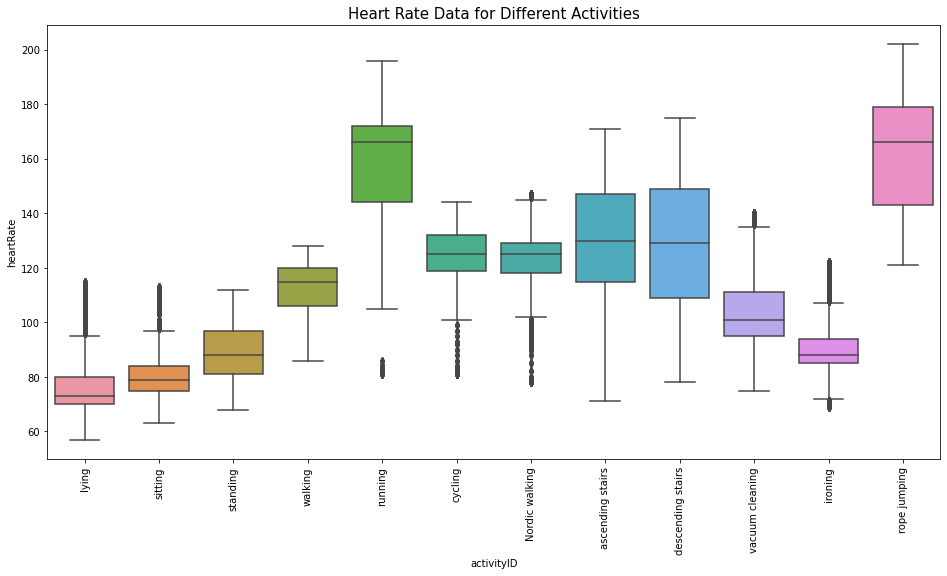

In [26]:
# Plots a Boxplot chart for the heartrate of each individual during various activities
avg_heartRate = PAMAP2_Train.heartRate.groupby(PAMAP2_Train.activityID).mean()
avg_heartRate.index = avg_heartRate.index.map(Dict_Activity_ID)
plt.subplots(figsize = (16,8))
b1 = sns.boxplot(data = PAMAP2_Train, x = "activityID", y = "heartRate")
b1_xaxis = list(avg_heartRate.index)
plt.title("Heart Rate Data for Different Activities", fontsize = 15)
b1.set_xticklabels(b1_xaxis, rotation = 90)
plt.show()

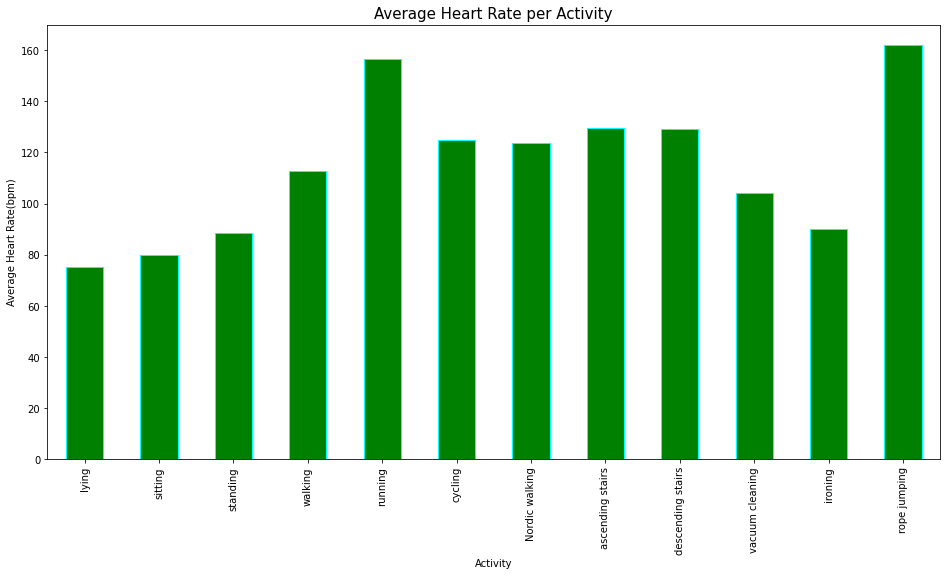

In [27]:
avg_heartRate.plot(kind = "bar", grid = False, figsize=(16,8), color = "green", edgecolor = "cyan")
plt.title("Average Heart Rate per Activity", fontsize = 15)
plt.xticks(rotation=90)
plt.ylabel("Average Heart Rate(bpm)")
plt.xlabel("Activity")
plt.show()

The charts indicate that activities that are not particularly vigorous, such as sitting, lying, standing, and ironing, have mean heart rates that are near the normal resting range for humans (60-100 bpm). Moderately vigorous activities, such as walking, cycling, Nordic walking, and ascending or descending stairs, tend to have mean heart rates of around 120 bpm. The most vigorous activities, such as running and rope jumping, have mean heart rates of around 160 bpm, with rope jumping being the closest to this value. However, lying has the lowest mean heart rate of all the activities. This suggests that heart rate can be a useful indicator of the intensity of physical activity, with higher heart rates generally corresponding to more vigorous activity.

Among all the 12 activities, rope jumping has the highest heart rate( 160𝑏𝑝𝑚 ) and lying has the least average heart rate ( 75𝑏𝑝𝑚 )

### 4c. Angular Velocity Analysis

Angular velocity, also known as rotational velocity or angular frequency, is a measure of the speed at which an object rotates or revolves around a point or axis, expressed in radians per second (rad/s). By examining the mean angular velocity at each location (hand, chest, and ankle) for each activity, it may be possible to gain insights into the characteristics of the activity and how it affects the rotational motion of the body. This information could be useful for detecting and classifying different types of physical activity.

In [28]:
# Calculate average acceleration of hands, chest and ankles.

handGyro_avg = PAMAP2_Train.handGyro.groupby(PAMAP2_Train.activityID).mean()
chestGyro_avg = PAMAP2_Train.chestGyro.groupby(PAMAP2_Train.activityID).mean()
ankleGyro_avg = PAMAP2_Train.ankleGyro.groupby(PAMAP2_Train.activityID).mean()

handGyro_avg.index = handGyro_avg.index.map(Dict_Activity_ID)
chestGyro_avg.index = chestGyro_avg.index.map(Dict_Activity_ID)
ankleGyro_avg.index = ankleGyro_avg.index.map(Dict_Activity_ID)

Avg_Gyro = pd.concat([handGyro_avg, chestGyro_avg, ankleGyro_avg], axis = 1)

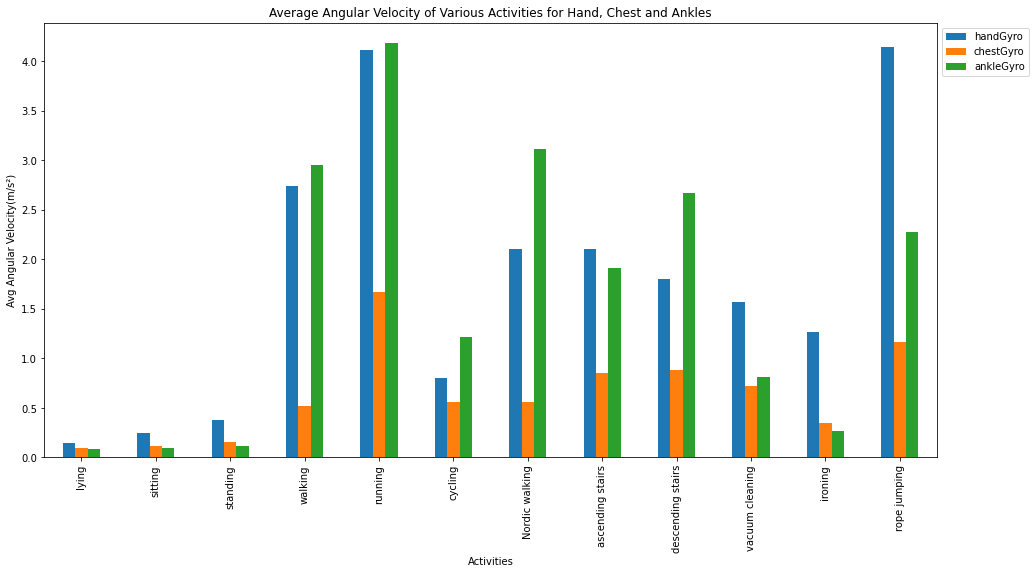

In [29]:
# Plots a bar chat showing Average Acceleration rates against Various Activities
Avg_Gyro.plot(kind = "bar", figsize = (16, 8))
plt.title("Average Angular Velocity of Various Activities for Hand, Chest and Ankles")
plt.ylabel("Avg Angular Velocity(m/s²)")
plt.xlabel("Activities")
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

### 4d. Acceleration Analysis

Acceleration is a measure of the rate at which the velocity of an object changes over time, expressed in meters per second squared $m/s^{2}$. By examining the mean acceleration at each location (hand, chest, and ankle) for each activity, it may be possible to gain insights into the characteristics of the activity and how it affects the acceleration of the body. 

In [30]:
'''
Calculate average acceleration of hands, chest and ankles.
Subtract value for acceleration due to gravity to accurately calculate force used by individuals.
'''
handAccel_avg = PAMAP2_Train.handAccel.groupby(PAMAP2_Train.activityID).mean() - 9.81
chestAccel_avg = PAMAP2_Train.chestAccel.groupby(PAMAP2_Train.activityID).mean() - 9.81
ankleAccel_avg = PAMAP2_Train.ankleAccel.groupby(PAMAP2_Train.activityID).mean() - 9.81

handAccel_avg.index = handAccel_avg.index.map(Dict_Activity_ID)
chestAccel_avg.index = chestAccel_avg.index.map(Dict_Activity_ID)
ankleAccel_avg.index = ankleAccel_avg.index.map(Dict_Activity_ID)

Avg_Accel = pd.concat([handAccel_avg, chestAccel_avg, ankleAccel_avg], axis = 1)

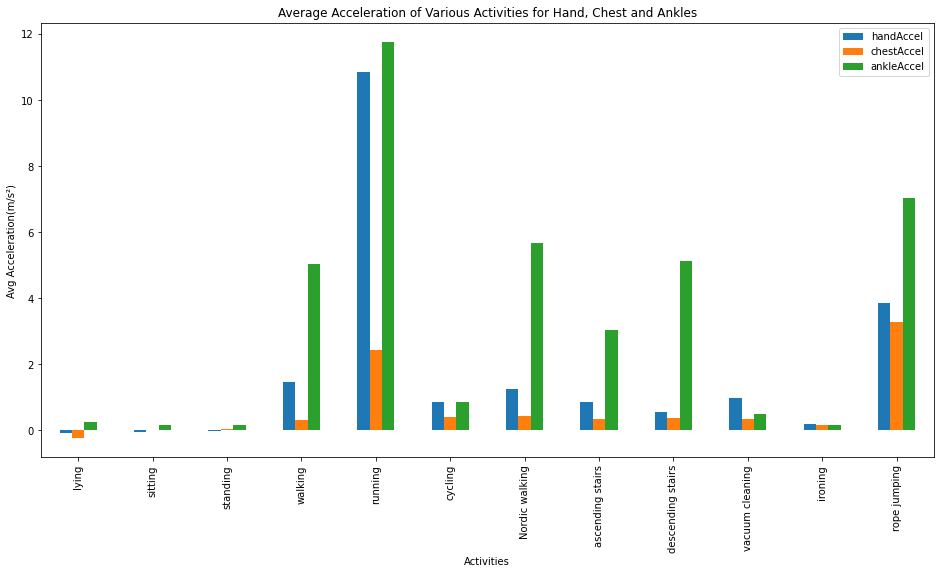

In [31]:
# Plots a bar chat showing Average Acceleration rates against Various Activities
sns.set
Avg_Accel.plot(kind = "bar", figsize = (16, 8))
plt.title("Average Acceleration of Various Activities for Hand, Chest and Ankles")
plt.ylabel("Avg Acceleration(m/s²)")
plt.xlabel("Activities")
plt.legend(loc = 'upper right', bbox_to_anchor = (1,1))
plt.show()

As expected, physically non challenging activities (lying,sitting,standing,ironing) have very low mean acceleration of different body parts. However physically challenging activities like running and rope jumping has considerably high mean acceleration value for ankle and hand. Also, activities with considerable leg movements like walking, Nordic walking,ascending and discending stairs have high ankle, cycling being an exception.

The chest acceleration is low for almost all activities except for rope jumping.

### 4e. Temperature Analysis

Temperature is a measure of the level of hotness or coldness of an object or environment, typically expressed in degrees Celsius $°C$. By analyzing the temperature readings at different locations (hand, chest, and ankle) in the dataset, it may be possible to gain insights into how physical activity affects the temperature of the body and how this can be used to detect and classify different types of activity.

#### Hand - Temperature Analysis

In [32]:
#Grouping temperature measurements at the hand
Temp_hand = PAMAP2_Train.handTemp.groupby(PAMAP2_Train.activityID)
T = Temp_hand.describe()
T.index = Temp_hand.describe().index.map(Dict_Activity_ID)
T

,count,mean,std,min,25%,50%,75%,max
activityID,,,,,,,,
lying,13881.0,32.733930,1.403579,30.1875,31.3125,32.8750,33.8125,34.9375
sitting,13558.0,33.264811,1.103839,31.5000,32.1250,33.5000,34.2500,35.0625
standing,13907.0,33.640199,0.855089,32.1875,33.0000,33.5625,34.2500,35.2500
walking,17339.0,32.301010,1.371259,28.6875,31.3750,32.5625,33.0625,34.8750
running,7070.0,30.809981,2.091097,27.9375,28.8125,30.8125,33.8125,33.8750
cycling,12050.0,31.017822,1.992719,27.5625,29.3125,31.0625,32.7500,34.6875
Nordic walking,13821.0,31.527760,1.752909,28.9375,30.3125,30.7500,33.0000,34.9375
ascending stairs,8526.0,33.524000,0.875765,31.7500,32.5625,33.7500,34.1250,35.1250
descending stairs,7671.0,33.324216,0.881537,31.5625,32.4375,33.5625,33.8750,34.8750


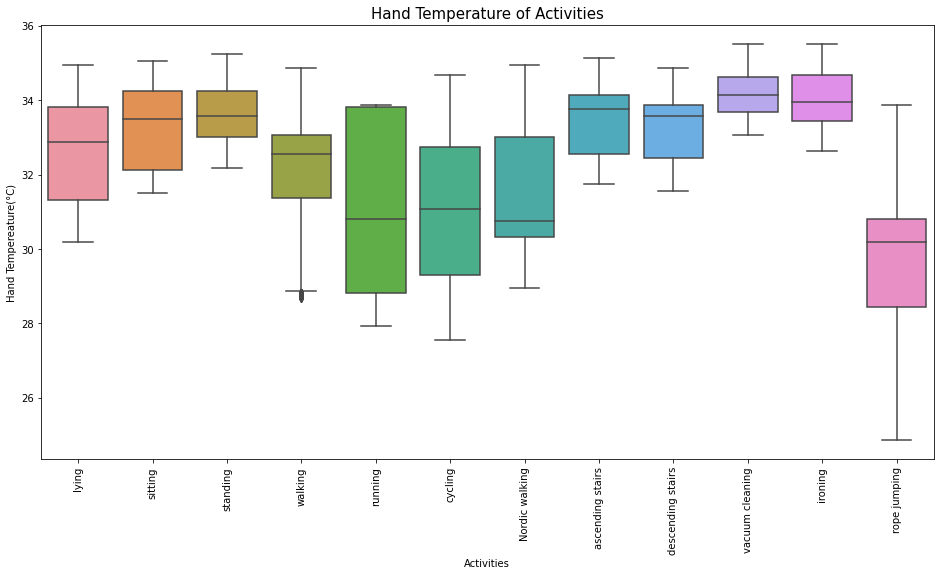

In [35]:
plt.subplots(figsize= (16, 8))
b1 = sns.boxplot(data = PAMAP2_Train, x = "activityID",y = "handTemp")
b1_xaxis = list(T.index)
plt.title("Hand Temperature of Activities", fontsize = 15)
b1.set_xticklabels(b1_xaxis, rotation = 90)
b1.set_xlabel("Activities")
b1.set_ylabel("Hand Tempereature(°C)")
plt.show()

#### Chest Temperature Analysis

In [36]:
# Analsysing temperature measurements at athe chest
Temp_chest = PAMAP2_Train.chestTemp.groupby(PAMAP2_Train.activityID)
TC = Temp_chest.describe()
TC.index = Temp_chest.describe().index.map(Dict_Activity_ID)


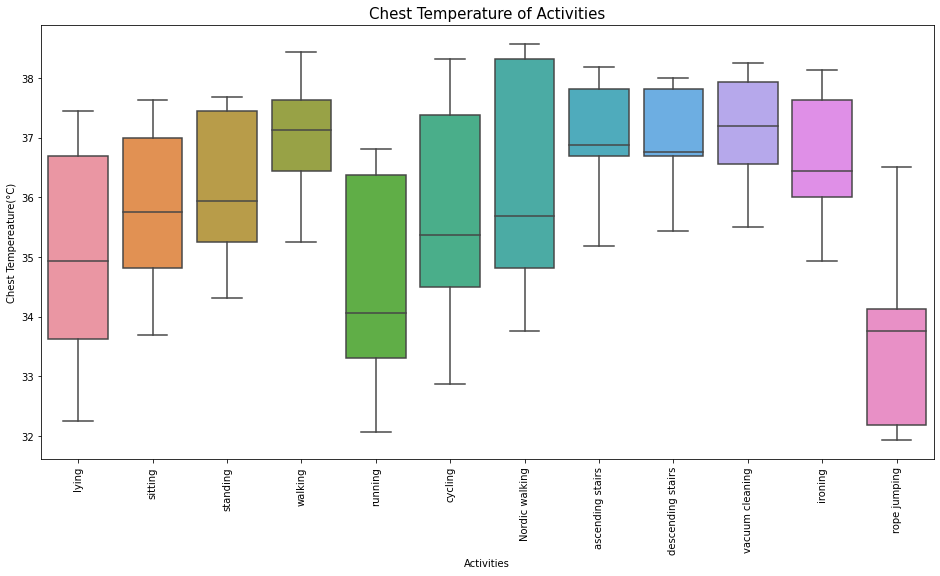

In [37]:
plt.subplots(figsize = (16, 8))
b1 = sns.boxplot(data = PAMAP2_Train, x = "activityID",y = "chestTemp")
b1_xaxis = list(TC.index)
plt.title("Chest Temperature of Activities", fontsize = 15)
b1.set_xticklabels(b1_xaxis, rotation = 90)
b1.set_xlabel("Activities")
b1.set_ylabel("Chest Tempereature(°C)")
plt.show()

### 4f. Correlation

In [38]:
# Removes columns not needed in calculating correlation
Corr_PAMAP2_Train = PAMAP2_Train.drop(["activityID", "subjectID", "timeStamp"], axis=1)

Corr_PAMAP2_Train.corr(method = "spearman").style.background_gradient()

,heartRate,handTemp,chestTemp,ankleTemp,handAccel,chestAccel,ankleAccel,handGyro,chestGyro,ankleGyro
heartRate,1.000000,-0.345522,-0.038621,-0.054674,0.170359,0.087220,0.255889,0.611987,0.647981,0.695113
handTemp,-0.345522,1.000000,0.743452,0.502715,-0.115619,0.021776,-0.112669,-0.160093,-0.140901,-0.256135
chestTemp,-0.038621,0.743452,1.000000,0.449952,-0.043760,0.073793,0.042367,0.119289,0.092470,0.124210
ankleTemp,-0.054674,0.502715,0.449952,1.000000,-0.005386,0.048878,-0.044347,0.122561,0.075123,-0.007430
handAccel,0.170359,-0.115619,-0.043760,-0.005386,1.000000,0.389411,0.163269,0.237999,0.215634,0.173339
chestAccel,0.087220,0.021776,0.073793,0.048878,0.389411,1.000000,0.196630,0.065115,0.131540,0.093848
ankleAccel,0.255889,-0.112669,0.042367,-0.044347,0.163269,0.196630,1.000000,0.208312,0.243938,0.381694
handGyro,0.611987,-0.160093,0.119289,0.122561,0.237999,0.065115,0.208312,1.000000,0.718146,0.695865
chestGyro,0.647981,-0.140901,0.092470,0.075123,0.215634,0.131540,0.243938,0.718146,1.000000,0.723629
ankleGyro,0.695113,-0.256135,0.124210,-0.007430,0.173339,0.093848,0.381694,0.695865,0.723629,1.000000


The correlation table indicates that there is a positive correlation between angular velocity attributes at all locations (hand, chest, and ankle) and heart rate. 

This means that as angular velocity increases, heart rate is also likely to increase. The temperature attributes are positively correlated with each other at every location, but they all show a negative correlation with heart rate, with the strongest negative correlation at the hand (-0.34). 

Additionally, the angular velocity attributes show strong correlations with each other at every location, while the acceleration attributes show positive correlations with each other and with heart rate, although the correlation scores for acceleration are not strong enough to be considered for further analysis. 

These observations suggest that heart rate, temperature, angular velocity, and acceleration may be related and could potentially be used to detect and classify different types of physical activity.

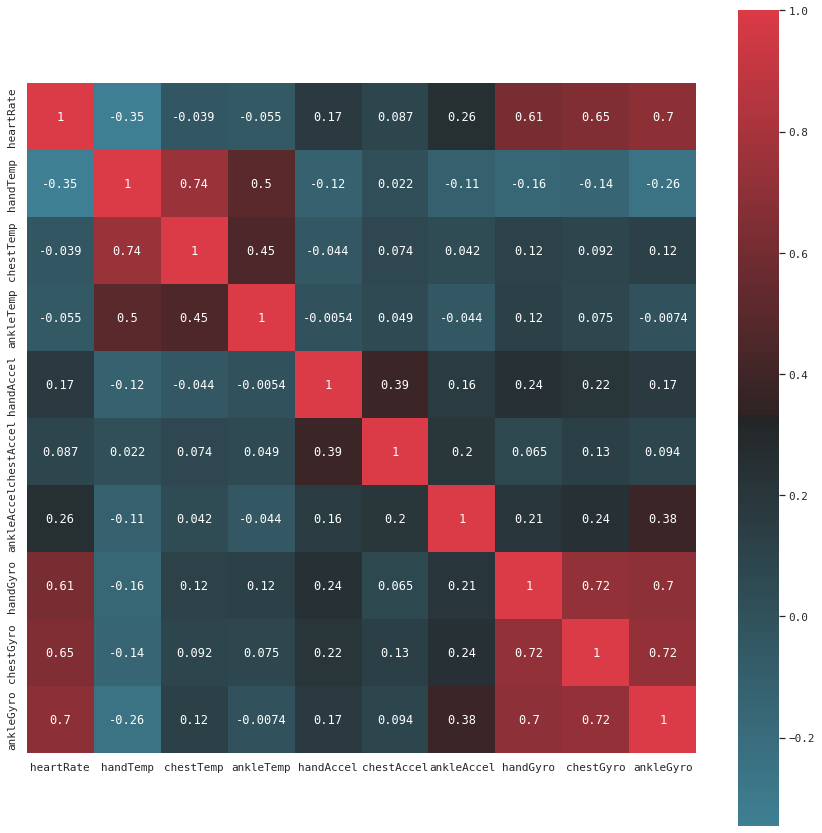

In [39]:
# Generates a further correlation heatmap using seaborn

Corr_PAMAP2_TrainMatrix = Corr_PAMAP2_Train.corr(method="spearman")
sns.set(font = "monospace")

fig, axe = plt.subplots(figsize = (15,15))
cmap = sns.diverging_palette(220, 10, center = "dark", as_cmap = True)

sns.heatmap(Corr_PAMAP2_TrainMatrix, vmax = 1,square = True, cmap = cmap,annot = True );

## 5. Hypothesis Testing

### 5a. Hypothesis Test 1

If heart rates and angular velocities correlate, then higher angular velocities will lead to increased and higher heart rates.

Independent Variable: Angular Velocity
Dependent Variable : Heart Rate


For this test, all angular velocity data with values larger than the average angular velocity of the chest, hand and ankle would be used. Values regarded as "high angular velocity" are relative to the average angular velocity values established in the dataset used for this report.


In [40]:
# Gathering angular velocity data and calculating confidence interval
Angular_Velocity = PAMAP2_Test[(PAMAP2_Test.handGyro > (PAMAP2_Test.handGyro.mean())) |
                       (PAMAP2_Test.chestGyro > (PAMAP2_Test.chestGyro.mean())) |
                       (PAMAP2_Test.ankleGyro > (PAMAP2_Test.ankleGyro.mean()))]


(a,b) = st.norm.interval(alpha = 0.95, loc = np.mean(Angular_Velocity.heartRate), 
                         scale = st.sem(Angular_Velocity.heartRate))

print(f"A confidence interval of 95% means that individuals with a high angular \nvelocity when in motion will produce heart rate values between {round(a,2)} \nand {round(b,2)}")

A confidence interval of 95% means that individuals with a high angular 
velocity when in motion will produce heart rate values between 120.11 
and 120.76


The classical mean test will be used to test the hypothesis. 

Taking the lower band into considerationo, the heart rate for individuals with angular velocities above the population average would have a mean greater than 120.11 bpm.

Null Hypothesis: 
* $H_{0}:µ<120.11bpm$  

Alternate Hypothesis: 
* $H_{1}:µ>120.11bpm$

Statistical significance to be used is 0.05

In [41]:
# Defining vriables for the classical Hypothesis Test and generating P value


SD = Angular_Velocity.heartRate.std()
mean_select = Angular_Velocity.heartRate.mean()
size = len(Angular_Velocity.heartRate)
null_mean = a

Z_value = (mean_select - null_mean)/(SD/np.power(size, 0.5))

Pvalue = 1 - st.norm.cdf(Z_value)
print(f"Probability value is: {Pvalue}")


Probability value is: 0.025000000000004685


 The p-value of ~0.025 is less than the specified statistical significance level of 0.05 or 5%, so there is strong evidence against the null hypothesis. This means that the null hypothesis can be rejected in favor of the alternative hypothesis, which suggests that the mean heart rate for individuals with angular velocities above the population average is greater than $120.11 bpm$.

### 5b. Hypothesis Test 2

If motion and heart rate correlate, then increased motion would lead to increased heart rates.

Independent Variable: Increased Motion
Dependent Variable: Heart Rate

More dynamic acivities that require increased motion would be used to carry out this test. In this dataset, ropejumping (24) and running(5) are the activities with the most dynamic motion and so we would be using this activities to compute this test.

In [42]:
# Data gathering and calculating confidence interval
increased_motion = PAMAP2_Test[(PAMAP2_Test.activityID == 5) | (PAMAP2_Test.activityID == 24)]


(a,b) = st.norm.interval(alpha = 0.95, loc = np.mean(increased_motion.heartRate), 
                         scale = st.sem(increased_motion.heartRate))

print(f"A confidence interval of 95% means that activities with increased motion such \nas ropejumping and running would lead to mean heart rates of {round(a,2)} and {round(b,2)} in individuals performing these \nactivities.")

A confidence interval of 95% means that activities with increased motion such 
as ropejumping and running would lead to mean heart rates of 156.93 and 158.68 in individuals performing these 
activities.


The classical mean test will be used to test the hypothesis. 

Taking the lower bound of the above calculations, we expect the individuals performing activities requiring increased motion to have a mean heart rate thas is greater than 156.93 bpm.

Null Hypothesis:
* $H_{0}:µ<156.93bpm$  

Alternate Hypothesis:
* $H_{1}:µ>156.93bpm$

Statistical significance to be used is 0.05

In [43]:
# Defining vriables for the classical Hypothesis Test and generating P value


SD = increased_motion.heartRate.std()
mean_select = increased_motion.heartRate.mean()
size = len(increased_motion.heartRate)
null_mean = a


Z_value = (mean_select - null_mean)/(SD/np.power(size, 0.5))

Pvalue = 1 - st.norm.cdf(Z_value)
print(f"Probability value is: {Pvalue}")

Probability value is: 0.024999999999998912


#### The p-value of ~0.024 is less than the specified statistical significance level of 0.05 or 5%, so there is strong evidence against the null hypothesis. This means that the null hypothesis can be rejected in favor of the alternative hypothesis, which suggests that the mean heart rate for individuals engaging in activities such as rope jumping and running will be greater than $156.93 bpm$.

## 6. Modelling

The goal of this project is to gather data and information that would help us develop hardware and/or software to determine the amount and type of physical activity carried out by an individual.

Modelling is a great way to test our earlier hypothesis before actually building said hardware/software to a high degree of accuracy and efficiency. 

This report would use different kinds of supervised learning models and would use accuracy and time complexity as criterias to determine the best model for this project. A model with high accuracy but requires a large amout of computational resources due to its time complexity would not be suitable for a device with limited processing power.

We begin by preparing the data to be used for modelling. For our models, we shall use the cleaned dataset we had at the beginning of this report PAMAP2 and we would be dropping columns we would not need for our predictions. 

In [44]:
# Rearranging our PAMAP2 dataset and storing the result in a new dataset PAMAP3
PAMAP3 = PAMAP2.sample(frac = 1, random_state = 39)

In [45]:
# Dropping subjectID and timeStamp columns
PAMAP4 = PAMAP3.drop(["timeStamp","subjectID"], axis=1)

# Drops activityID data from the dataset and creates a new dataframe called PAMAP_Features
PAMAP_Features = PAMAP4.drop(["activityID"], axis=1)

#creates a new dataframe called PAMAP_Target containing activityID data
PAMAP_Target = PAMAP4["activityID"]

We would be usign Robust Scaler as our data is distorted and not distributed normally

In [46]:
# Introducing Robust Scaler
scaler = RobustScaler()

a_train, a_test, b_train, b_test = train_test_split(PAMAP_Features, PAMAP_Target, test_size = 0.2, 
                                                    random_state = 39)

a_train = scaler.fit_transform(a_train)

a_test = scaler.transform(a_test)

Next, we define functions to determine the accuracy and precision of the dataset as well as getting the Recall and F1 scores.

Where Accuracy in this context is deifned as the ***proportion of correct predictions made by the model out of all predictions.***

Precision in this context is defined as the ***measure of the proportion of correct positive predictions made by the model out of all POSITIVE predictions.***

Recall (also known as sensitivity or true positive rate) in the context of this report is defined as the ***measure of the proportion of actual positive instances that were correctly predicted by the model.***

In [47]:
# Defines the function to obtain accuracy, precision, recall and F1 score
def imp_metric (true, predicted):
    acc = accuracy_score(true, predicted)
    prec = precision_score(true, predicted,average = None).mean() 
    rec = recall_score(true, predicted, average = None).mean()
    f1 = f1_score(true, predicted, average = None).mean()
   
    print(f"DAta Model Accuracy is: {round(acc*100,2)}% \nData Model Precision is: {round(prec*100,2)}% \nData Model Recall is: {round(rec*100,2)}% \nData Model F1 Score is: {round(f1*100,2)}%")

A tool is needed to visualise the performance of our models and for this, a **Confusion Matrix** will be used.

A Confusion Matrix is a useful tool for visualizing the performance of a supervised machine learning model, particularly for classification tasks.

It is useful for understanding the specific types of errors made by a model, as well as the overall accuracy of the model. They can also be useful for comparing the performance of different models or for identifying patterns in the data that might be affecting the model's performance.

A function to provide a Confusion Matrix would be defined next.

In [48]:
# Defiens a Confusion Matrix function
def Confusion_Matrix(true, predicted, classifier = ""):  
    plt.rcParams["figure.figsize"] = (16, 10)
    display = sns.heatmap(confusion_matrix(true, predicted), cmap="Reds", annot = True,fmt = "d")
    display.set_xticklabels(Activities, rotation = 90)
    display.set_yticklabels(Activities, rotation = 0)
    plt.xlabel("Predicted Values", size = 15)
    plt.ylabel("True Values", size = 15)
    plt.title(classifier, fontsize = 18)
    plt.show()

As training and testing of the models can take some time to compute , we would use **PCA (Principle Component Analysis)** to reduce the dimension of the features and thereby reduce the training and testing times.

**PCA** works by projecting the data onto a new set of orthogonal (uncorrelated) axes, known as principal components, that capture the most important variations in the data. These new axes are chosen such that the first principal component has the highest possible variance, the second principal component has the second highest variance, and so on. By retaining only the most important principal components, it is possible to reduce the dimensionality of the data while still preserving as much of the original information as possible.

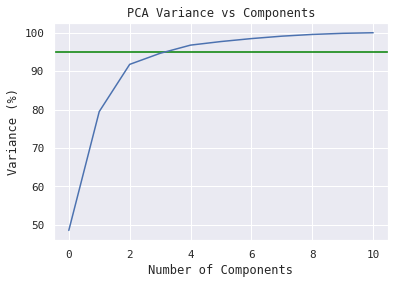

In [49]:
# Generating PCA 
pca = PCA()
pca.fit(a_train)

# Shows the variance within the components
variance = pca.explained_variance_ratio_ 
varianceI = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4) * 100)
plt.title("PCA Variance vs Components")
plt.ylabel("Variance (%)")
plt.xlabel("Number of Components")

# Determines the point by which Variance would be captured. Meeting point set at 95 to capture 95% variance
l = plt.axhline(95, color = "green")
plt.plot(varianceI)
plt.show()

From the figure above, the green and blue lines intersect at ~3, this indicates that we would need 6 components to capture 95% variance

In [50]:
# Using PCA to reduce number of components to 6  and reduce dimensionality
pca = PCA(n_components = 3)

# Fits a_train data
a_trainPCA = pca.fit_transform(a_train)

# Using same PCA object to transform a_test data
a_testPCA = pca.transform(a_test)

In [51]:
# Displays the 6 columns generated by the PCA object
a_traindf = pd.DataFrame(a_trainPCA, columns=['PCA1','PCA2','PCA3'])
a_traindf

,PCA1,PCA2,PCA3
0,-1.354470,-0.801093,-0.433121
1,-1.602489,-0.777238,-0.245127
2,3.407759,1.328374,-0.501375
3,-0.118601,-1.641088,1.373641
4,2.222372,0.702744,-1.515417
...,...,...,...
141921,-1.833085,-0.472322,-0.328117
141922,-6.662221,2.723173,3.170742
141923,18.470269,-14.261122,17.549994
141924,-0.650339,-1.284824,0.473133


### 6a. Support Vector Classifier (SVC)

Support vector classifiers (SVCs) are a type of linear classifier that can be used for classification tasks. They work by finding the hyperplane in a high-dimensional space that maximally separates the classes, and making predictions based on which side of the hyperplane a new input point falls on.

An SVC model object would be created and trained with the train dataset, then we would use the model to predict the activities using the activityID before presenting the metrics of the model for analysis. We would first do the training and testing of this model with the entire train/test dataset before testing with the PCA dataset.

In [52]:
# Rearranging our PAMAP2 dataset and storing the result in a new dataset PAMAP3
PAMAP3 = PAMAP2.sample(frac = 1, random_state = 35)

In [53]:
# Dropping subjectID and timeStamp columns
PAMAP4 = PAMAP3.drop(["timeStamp","subjectID"], axis=1)

# Drops activityID data from the dataset and creates a new dataframe called PAMAP_Features
PAMAP_Features = PAMAP4.drop(["activityID"], axis=1)

#creates a new dataframe called PAMAP_Target containing activityID data
PAMAP_Target = PAMAP4["activityID"]

a_train, a_test, b_train, b_test = train_test_split(PAMAP_Features, PAMAP_Target, test_size = 0.2, 
                                                    random_state = 40)

a_train = scaler.fit_transform(a_train)

a_test = scaler.transform(a_test)

### SVC Model without PCA

In [54]:
%%time
# Generates an SVC model
SVC_Model = SVC(kernel = 'rbf')

# Trains the SVC model
SVC_Model.fit(a_train, b_train)

CPU times: total: 8min 28s
Wall time: 10min 4s


SVC()

SVC Model takes a combined 18min 32s to train

In [55]:
%%time

SVC_Model_Predict_b = SVC_Model.predict(a_test)

print(len(SVC_Model_Predict_b))

print(len(b_test))

print(SVC_Model_Predict_b[0:5])

print(b_test[0:5])

35482
35482
[17  2  2  7 16]
1867465    17
1128866     2
427884      2
1671681     7
1552009    16
Name: activityID, dtype: int64
CPU times: total: 4min 33s
Wall time: 6min 31s


SVC Model takes a combined 11min 4s to test

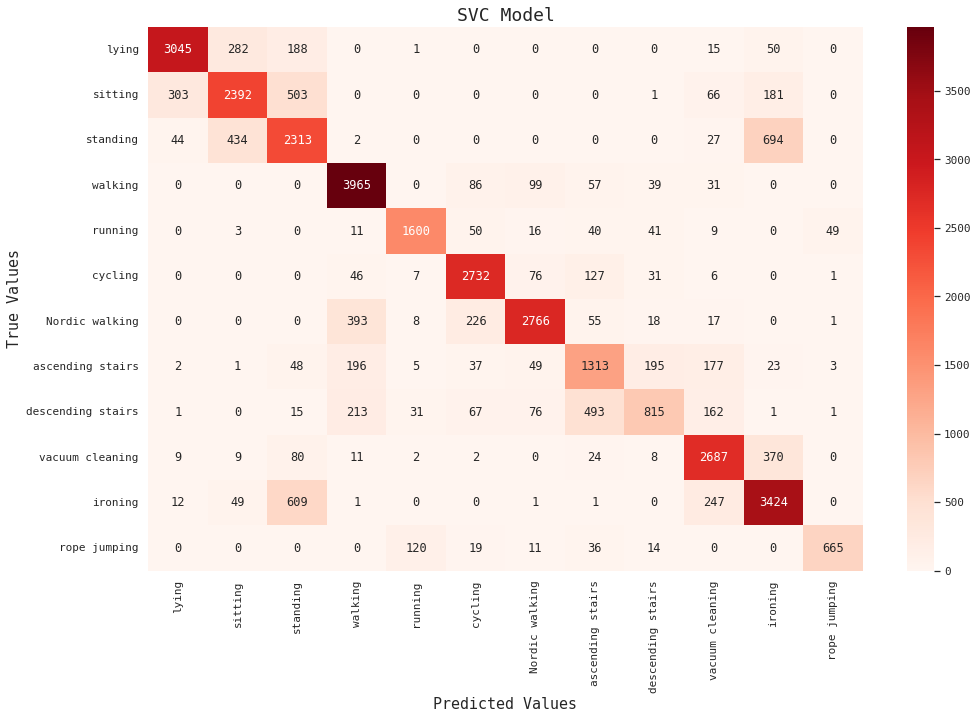

In [56]:
# Displays a confusion matrix of the SVC model
Confusion_Matrix(b_test, SVC_Model_Predict_b, "SVC Model" )

In [57]:
# Displays the metrics of the SVC model
imp_metric(b_test, SVC_Model_Predict_b)

DAta Model Accuracy is: 78.12% 
Data Model Precision is: 78.87% 
Data Model Recall is: 76.48% 
Data Model F1 Score is: 77.25%


Without doing dimensionality reduction with PCA, we get an accuracy of 78.12%.

### SVC Model with PCA

In [58]:
%%time

#Generates an SVC model
SVC_Model = SVC(kernel = 'rbf')

#Trains SVC model with PCA object
SVC_Model.fit(a_trainPCA, b_train)

CPU times: total: 31min 43s
Wall time: 36min 1s


SVC()

With PCA applied to the SVC Model takes it takes even longer to complete, taking a cPU time of 31mins 43s to train

In [59]:
%%time

SVC_Model_Predict_bPCA = SVC_Model.predict(a_testPCA)

print(len(SVC_Model_Predict_bPCA))

print(len(b_test))

print(SVC_Model_Predict_bPCA[0:5])

print(b_test[0:5])

35482
35482
[4 4 4 4 4]
1867465    17
1128866     2
427884      2
1671681     7
1552009    16
Name: activityID, dtype: int64
CPU times: total: 7min 9s
Wall time: 8min 23s


SVC Model takes a combined 15min 32s to test with PCA applied

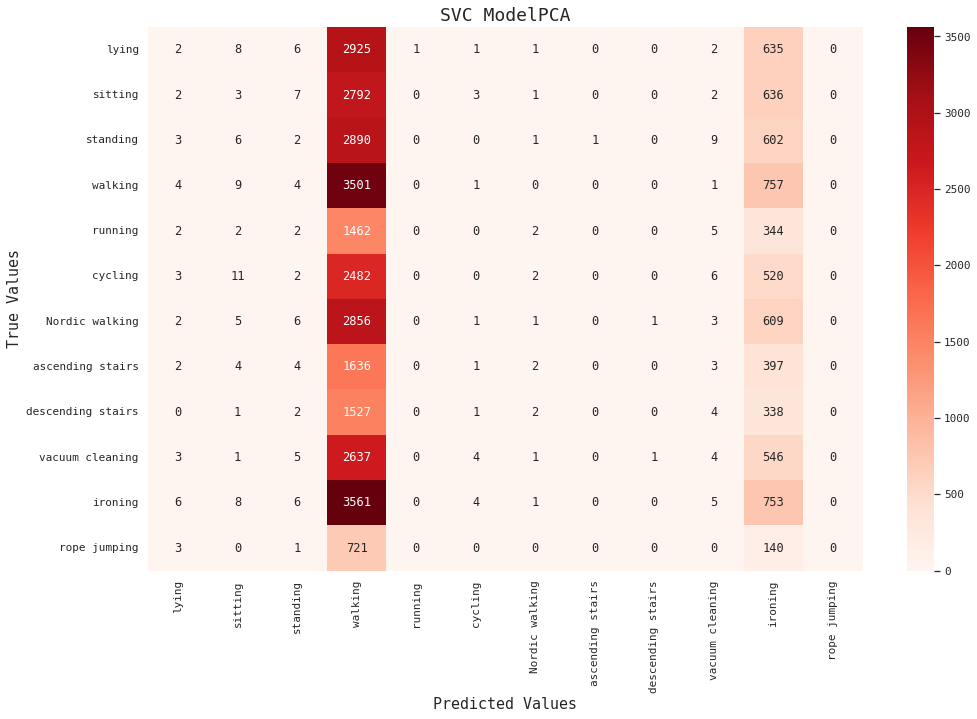

In [60]:
# Displays a confusion matrix of the SVC model with PCA
Confusion_Matrix(b_test, SVC_Model_Predict_bPCA, "SVC ModelPCA" )

In [61]:
# Displays the metrics of the SVC model with PCA
imp_metric(b_test, SVC_Model_Predict_bPCA)

DAta Model Accuracy is: 12.02% 
Data Model Precision is: 4.67% 
Data Model Recall is: 8.3% 
Data Model F1 Score is: 2.99%


Applying PCA to the SVC model we can see that our accuracy has reduced to 12.02%

We can see that using PCA in this scenario is slowing down the model and also leading to the model giving very poor results.

### 6b. Logistic Regression Model

Logistic regression is a supervised machine learning algorithm that can be used for classification tasks. It works by estimating the parameters of a logistic model, which is a statistical model that models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables (also known as the input features).

A Logistic Regression model object would be created and trained with the train dataset, then we would use the model to predict the activities using the activityID before presenting the metrics of the model for analysis. We would first do the training and testing of this model with the entire train/test dataset before testing with the PCA dataset.

### Logistic Regression Model without PCA

In [62]:
%%time
# Generates a Logistic Regression Model (LR)
LR = LogisticRegression()

# Trains Logistic Regression model LR
LR.fit(a_train, b_train)

CPU times: total: 17 s
Wall time: 12 s


LogisticRegression()

Logistic Regression Model takes a combined 26.4s to train

In [63]:
%%time

#Use Logistic Regression to predict activities

LR_Predict_b = LR.predict(a_test)

print(len(LR_Predict_b))

print(len(b_test))

print(LR_Predict_b[0:5])

print(b_test[0:5])

35482
35482
[17  2  2  4 16]
1867465    17
1128866     2
427884      2
1671681     7
1552009    16
Name: activityID, dtype: int64
CPU times: total: 46.9 ms
Wall time: 9.29 ms


Logistic Regression Model takes a combined 55.38ms to test

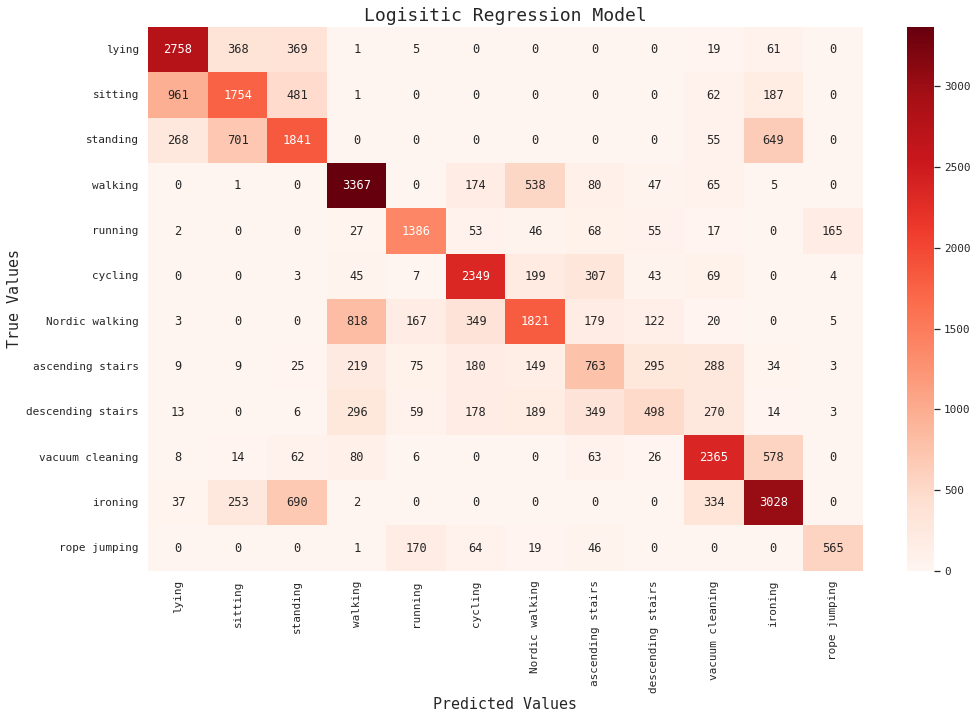

In [64]:
# Displays a confusion matrix of the Logistic Regression model
Confusion_Matrix(b_test, LR_Predict_b, "Logisitic Regression Model" )

In [65]:
# Displays the metrics of the Logistic Regression model
imp_metric(b_test, LR_Predict_b)

DAta Model Accuracy is: 63.4% 
Data Model Precision is: 62.34% 
Data Model Recall is: 61.48% 
Data Model F1 Score is: 61.53%


Without doing dimensionality reduction with PCA, we get an accuracy of 63.4%.

### Logistic Regression Model with PCA

In [66]:
%%time

#Trains Logistic Regression model LR with PCA object
LR.fit(a_trainPCA, b_train)

CPU times: total: 5.3 s
Wall time: 3.61 s


LogisticRegression()

Logistic Regression Model takes a combined 8.91s to train with PCA applied

In [67]:
%%time

# Use Logistic Regression to predict activities with PCA object

LR_Predict_bPCA = LR.predict(a_testPCA)

print(len(LR_Predict_bPCA))

print(len(b_test))

print(LR_Predict_bPCA[0:5])

print(b_test[0:5])

35482
35482
[ 4  4 17  4  4]
1867465    17
1128866     2
427884      2
1671681     7
1552009    16
Name: activityID, dtype: int64
CPU times: total: 31.2 ms
Wall time: 12.9 ms


Logistic Regression Model takes a combined 43.11ms to test with PCA applied

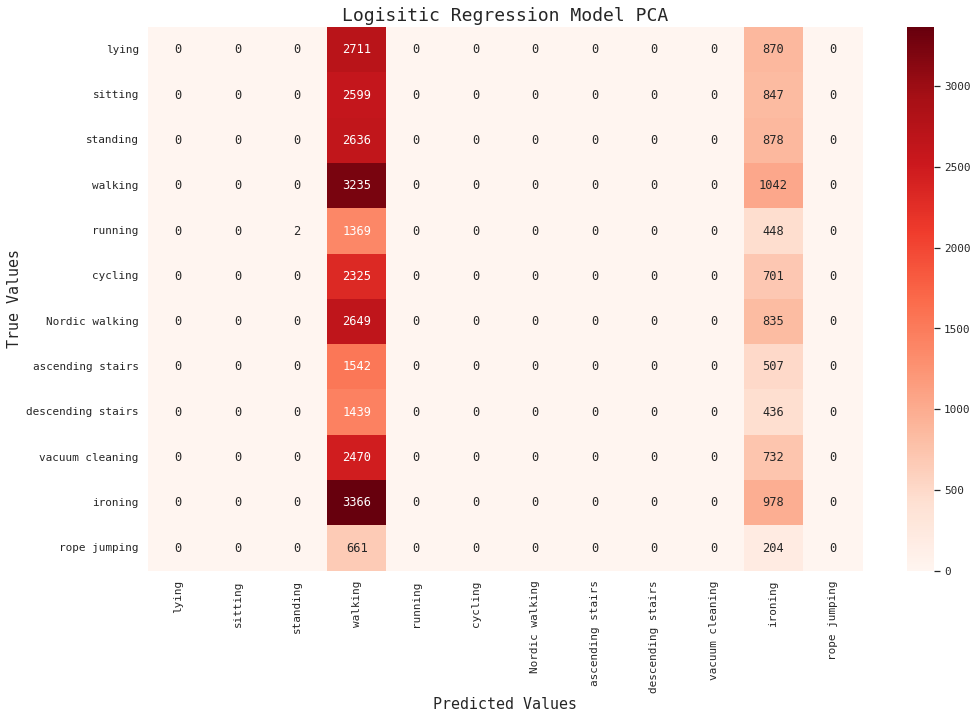

In [68]:
# Displays a confusion matrix of the Logisitic Regression model with PCA
Confusion_Matrix(b_test, LR_Predict_bPCA, "Logisitic Regression Model PCA" )

In [69]:
# Displays the metrics of the Logistic Regression model with PCA
imp_metric(b_test, LR_Predict_bPCA)

DAta Model Accuracy is: 11.87% 
Data Model Precision is: 1.96% 
Data Model Recall is: 8.18% 
Data Model F1 Score is: 2.99%


Applying PCA to the Logistic Regression model we can see that our accuracy has reduced to 11.87%

### 6c. Random Forest Classifier

A Random Forest Classifier is a supervised machine learning algorithm that can be used for classification tasks. It is an ensemble learning method, which means that it is composed of multiple smaller models (called "trees") that work together to make final predictions.

Random Forest Classifier works by training multiple decision tree models on different subsets of the training data. Each tree makes a prediction, and the random forest classifier combines the predictions of all the trees to make a final prediction. This combination of predictions helps to reduce overfitting and improve the overall performance of the model.

A Random Forest Classifier object would be created and trained with the train dataset, then we would use the model to predict the activities using the activityID before presenting the metrics of the model for analysis. We would first do the training and testing of this model with the entire train/test dataset before testing with the PCA dataset.

### Random Forest Classifier without PCA


In [70]:
%%time
# Generates Random Forest Classifier Object (RF)
RF = RandomForestClassifier()

#Trains The Random Forest Classifier (RF)
RF.fit(a_train, b_train)

CPU times: total: 23.5 s
Wall time: 36.6 s


RandomForestClassifier()

Random Forest Classifier algorithm takes a combined 1min 1s to train

In [71]:
%%time
# Use Random Forest Classifier to predict activities

RF_Predict = RF.predict(a_test)

print(len(RF_Predict))

print(len(b_test))

print(RF_Predict[0:5])

print(b_test[0:5])

35482
35482
[17  2  2  7 16]
1867465    17
1128866     2
427884      2
1671681     7
1552009    16
Name: activityID, dtype: int64
CPU times: total: 625 ms
Wall time: 1.47 s


Random Forest Classifier algorithm takes a combined 1min 2.09s to test

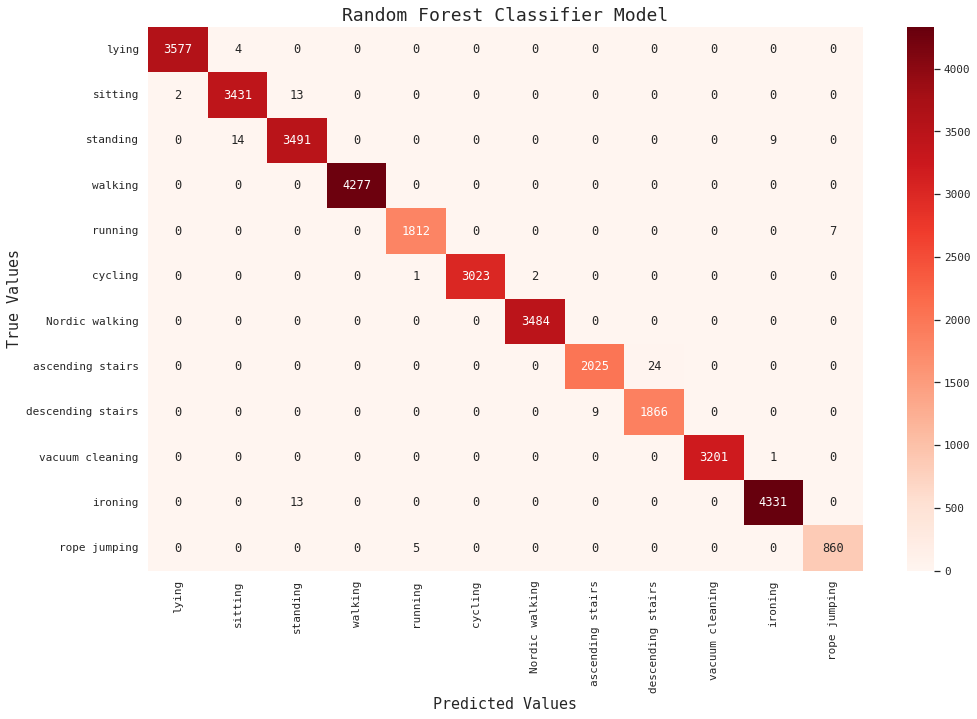

In [72]:
# Displays a confusion matrix of the Random Forest Classifier model
Confusion_Matrix(b_test, RF_Predict, "Random Forest Classifier Model" )

In [73]:
# Displays the metrics of the Random Forest Classifier model 
imp_metric(b_test, RF_Predict)

DAta Model Accuracy is: 99.71% 
Data Model Precision is: 99.63% 
Data Model Recall is: 99.65% 
Data Model F1 Score is: 99.64%


Without doing dimensionality reduction with PCA, we get an accuracy of 99.71%

### Random Forest Classifier with PCA


In [74]:
%%time
#Trains Random Forest Classifier (RF) with PCA object
RF.fit(a_trainPCA, b_train)

CPU times: total: 43.5 s
Wall time: 1min 7s


RandomForestClassifier()

Random Forest Classifier algorithm takes a combined 1min 50s to train with PCA applied

In [75]:
%%time

# Use Random Forest Classifier to predict activities with PCA object

RF_PredictPCA = RF.predict(a_testPCA)

print(len(RF_PredictPCA))

print(len(b_test))

print(RF_PredictPCA[0:5])

print(b_test[0:5])

35482
35482
[4 1 1 2 7]
1867465    17
1128866     2
427884      2
1671681     7
1552009    16
Name: activityID, dtype: int64
CPU times: total: 1.64 s
Wall time: 2.69 s


Random Forest Classifier algorithm takes a combined 5.4s to test with PCA applied

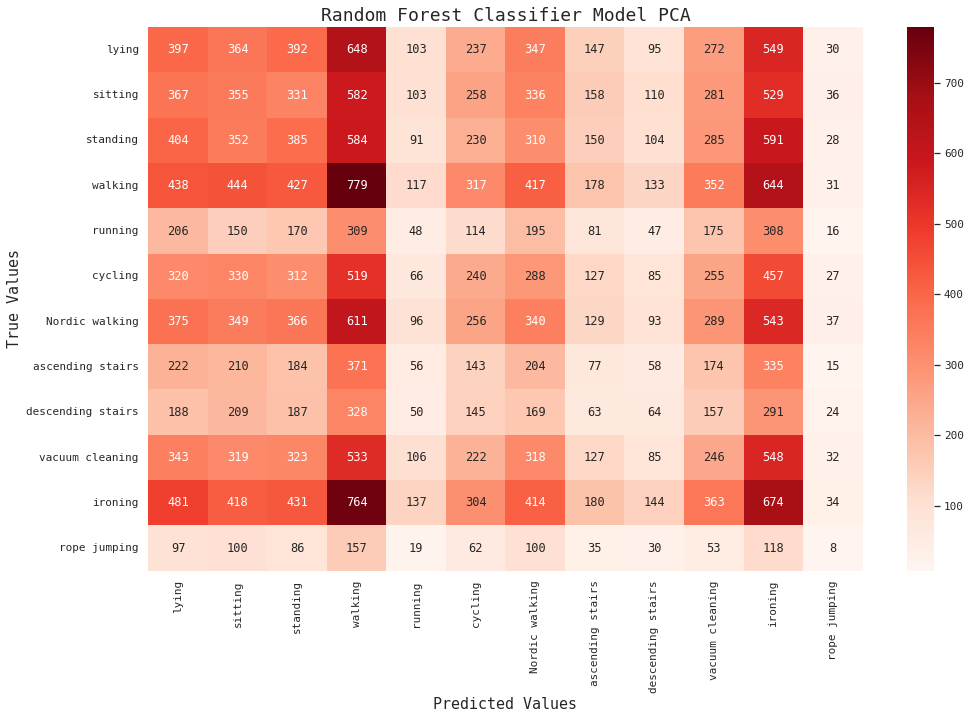

In [76]:
# Displays a confusion matrix of the Random Forest Classifier model with PCA
Confusion_Matrix(b_test, RF_PredictPCA, "Random Forest Classifier Model PCA" )

In [77]:
# Displays the metrics of the Random Forest Classifier model with PCA
imp_metric(b_test, RF_PredictPCA)

DAta Model Accuracy is: 10.18% 
Data Model Precision is: 8.52% 
Data Model Recall is: 8.52% 
Data Model F1 Score is: 8.35%


Applying PCA to the Random Forest Classifier algorithm we can see that our accuracy has reduced to 10.18%

Considering all three models that was tested; Support Vector Classifier, Logistic Regression and Random Forest Classifier, We can deduce the following:

* Support Vector Classifier had adequate accuracy but was the slowest to compute.

* Logistic Regression was faster but least accurate.

* Random Forest Classifier had the best numbers for both accuracy and time complexity.

It was also observed that applying PCA to reduce the dimensions slowed down execution time and **grealy** decreased the accuracy of the models. 

With all these observations gathered, Random Forest Classifier would be the best model to use for the next steps of developing the software/hardware. 

### 7. Applying Models

###  Random  Forest Classifier without Temperature

In [78]:
# Dropping subjectID and timeStamp columns
PAMAP4 = PAMAP3.drop(["timeStamp","subjectID", "handTemp", "chestTemp", "ankleTemp"], axis=1)

# Drops activityID data from the dataset and creates a new dataframe called PAMAP_Features
PAMAP_Features = PAMAP4.drop(["activityID"], axis=1)

#creates a new dataframe called PAMAP_Target containing activityID data
PAMAP_Target = PAMAP4["activityID"]

# Introducing Robust Scaler
scaler = RobustScaler()

# Splits train and test data
a_train, a_test, b_train, b_test = train_test_split(PAMAP_Features, PAMAP_Target, test_size = 0.2, 
                                                    random_state = 30)
# Scales train dataset
a_train = scaler.fit_transform(a_train)

#Scales test dataset
a_test = scaler.transform(a_test)

In [79]:
#Trains Random Forest Classifier (RF)
RF.fit(a_train, b_train)

RandomForestClassifier()

In [80]:
# Use Random Forest Classifier to predict activities

RF_Predict = RF.predict(a_test)

print(len(RF_Predict))

print(len(b_test))

print(RF_Predict[0:5])

print(b_test[0:5])

35482
35482
[13  4 13 17  6]
840213      1
1064666     4
1265662    13
2528049     3
2759688     6
Name: activityID, dtype: int64


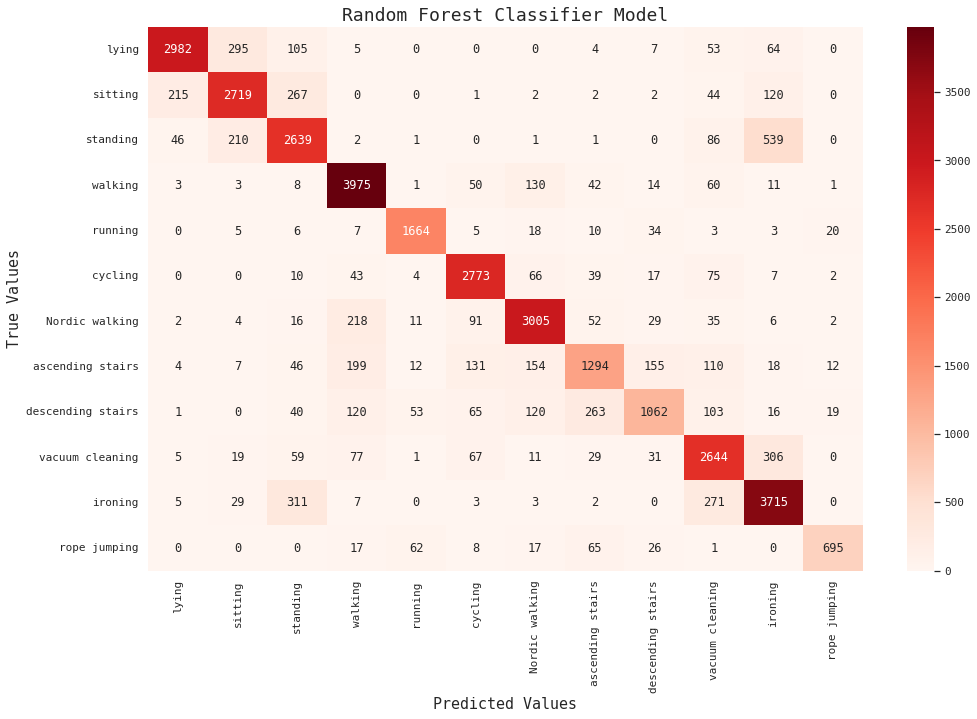

In [81]:
# Displays a confusion matrix of the Random Forest Classifier model
Confusion_Matrix(b_test, RF_Predict, "Random Forest Classifier Model" )

In [82]:
# Displays the metrics of the Random Forest Classifier model 
imp_metric(b_test, RF_Predict)

DAta Model Accuracy is: 82.2% 
Data Model Precision is: 82.75% 
Data Model Recall is: 80.57% 
Data Model F1 Score is: 81.39%


### Random  Forest Classifier without Angular Velocity

In [83]:
# Dropping subjectID and timeStamp columns
PAMAP4 = PAMAP3.drop(["timeStamp","subjectID", "handGyro", "chestGyro", "ankleGyro"], axis=1)

# Drops activityID data from the dataset and creates a new dataframe called PAMAP_Features
PAMAP_Features = PAMAP4.drop(["activityID"], axis=1)

#creates a new dataframe called PAMAP_Target containing activityID data
PAMAP_Target = PAMAP4["activityID"]

# Introducing Robust Scaler
scaler = RobustScaler()

# Splits train and test data
a_train, a_test, b_train, b_test = train_test_split(PAMAP_Features, PAMAP_Target, test_size = 0.2, 
                                                    random_state = 30)
# Scales train dataset
a_train = scaler.fit_transform(a_train)

#Scales test dataset
a_test = scaler.transform(a_test)

In [84]:
#Trains Random Forest Classifier (RF) 
RF.fit(a_train, b_train)

RandomForestClassifier()

In [85]:
# Use Random Forest Classifier to predict activities

RF_Predict = RF.predict(a_test)

print(len(RF_Predict))

print(len(b_test))

print(RF_Predict[0:5])

print(b_test[0:5])

35482
35482
[ 1  4 13  3  6]
840213      1
1064666     4
1265662    13
2528049     3
2759688     6
Name: activityID, dtype: int64


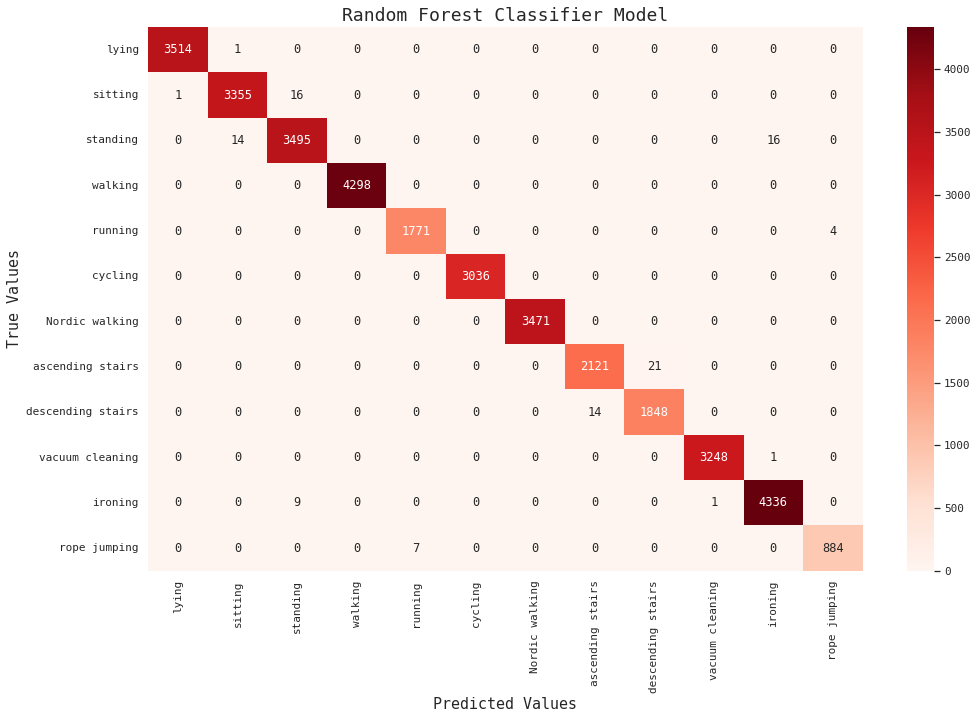

In [86]:
# Displays a confusion matrix of the Random Forest Classifier model
Confusion_Matrix(b_test, RF_Predict, "Random Forest Classifier Model" )

In [87]:
# Displays the metrics of the Random Forest Classifier model 
imp_metric(b_test, RF_Predict)

DAta Model Accuracy is: 99.7% 
Data Model Precision is: 99.65% 
Data Model Recall is: 99.63% 
Data Model F1 Score is: 99.64%


### Random Forest Classifier without Acceleration

In [88]:
# Dropping subjectID and timeStamp columns
PAMAP4 = PAMAP3.drop(["timeStamp","subjectID", "handAccel", "chestAccel", "ankleAccel"], axis=1)

# Drops activityID data from the dataset and creates a new dataframe called PAMAP_Features
PAMAP_Features = PAMAP4.drop(["activityID"], axis=1)

#creates a new dataframe called PAMAP_Target containing activityID data
PAMAP_Target = PAMAP4["activityID"]

# Introducing Robust Scaler
scaler = RobustScaler()

# Splits train and test data
a_train, a_test, b_train, b_test = train_test_split(PAMAP_Features, PAMAP_Target, test_size = 0.2, 
                                                    random_state = 30)
# Scales train dataset
a_train = scaler.fit_transform(a_train)

#Scales test dataset
a_test = scaler.transform(a_test)

In [89]:
#Trains Random Forest Classifier (RF) 
RF.fit(a_train, b_train)

RandomForestClassifier()

In [90]:
# Use Random Forest Classifier to predict activities

RF_Predict = RF.predict(a_test)

print(len(RF_Predict))

print(len(b_test))

print(RF_Predict[0:5])

print(b_test[0:5])

35482
35482
[ 1  4 13  3  6]
840213      1
1064666     4
1265662    13
2528049     3
2759688     6
Name: activityID, dtype: int64


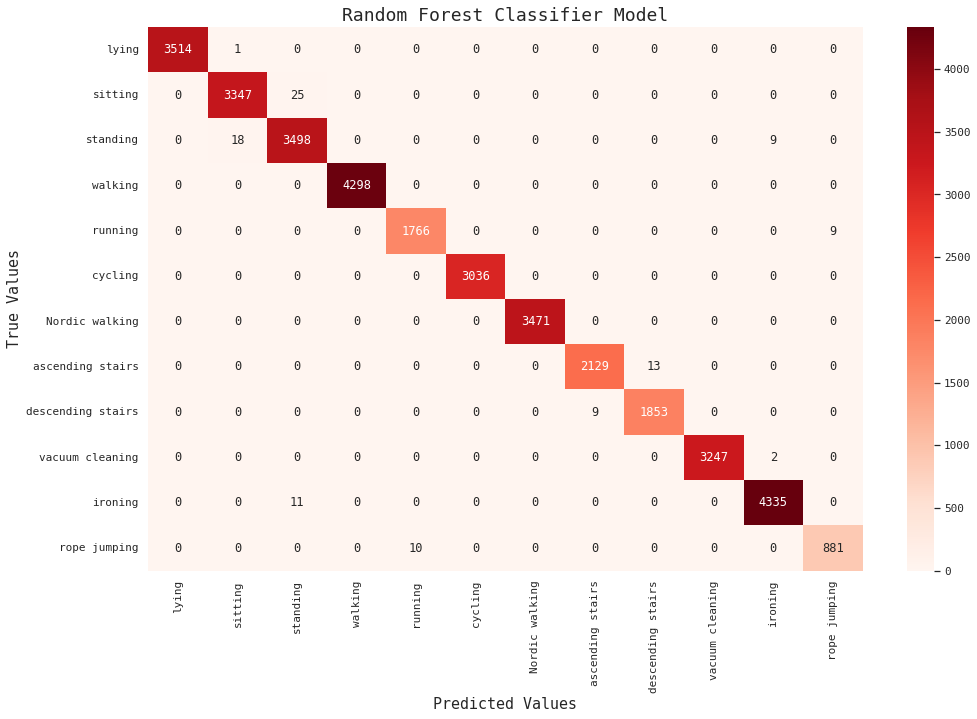

In [91]:
# Displays a confusion matrix of the Random Forest Classifier model
Confusion_Matrix(b_test, RF_Predict, "Random Forest Classifier Model" )

In [92]:
# Displays the metrics of the Random Forest Classifier model 
imp_metric(b_test, RF_Predict)

DAta Model Accuracy is: 99.7% 
Data Model Precision is: 99.62% 
Data Model Recall is: 99.62% 
Data Model F1 Score is: 99.62%


### Random Forest Classifier using only Ankle data

In [93]:
# Dropping subjectID and timeStamp columns along with hand and chest data
PAMAP4 = PAMAP3.drop(["timeStamp","subjectID", "handAccel", "handTemp", "handGyro", "chestAccel", "chestTemp", "chestGyro"], axis=1)

# Drops activityID data from the dataset and creates a new dataframe called PAMAP_Features
PAMAP_Features = PAMAP4.drop(["activityID"], axis=1)

#creates a new dataframe called PAMAP_Target containing activityID data
PAMAP_Target = PAMAP4["activityID"]

# Introducing Robust Scaler
scaler = RobustScaler()

# Splits train and test data
a_train, a_test, b_train, b_test = train_test_split(PAMAP_Features, PAMAP_Target, test_size = 0.2, 
                                                    random_state = 30)
# Scales train dataset
a_train = scaler.fit_transform(a_train)

#Scales test dataset
a_test = scaler.transform(a_test)

In [94]:
#Trains Random Forest Classifier (RF) 
RF.fit(a_train, b_train)

RandomForestClassifier()

In [95]:
# Use Random Forest Classifier to predict activities

RF_Predict = RF.predict(a_test)

print(len(RF_Predict))

print(len(b_test))

print(RF_Predict[0:5])

print(b_test[0:5])

35482
35482
[ 1  4 13  3  6]
840213      1
1064666     4
1265662    13
2528049     3
2759688     6
Name: activityID, dtype: int64


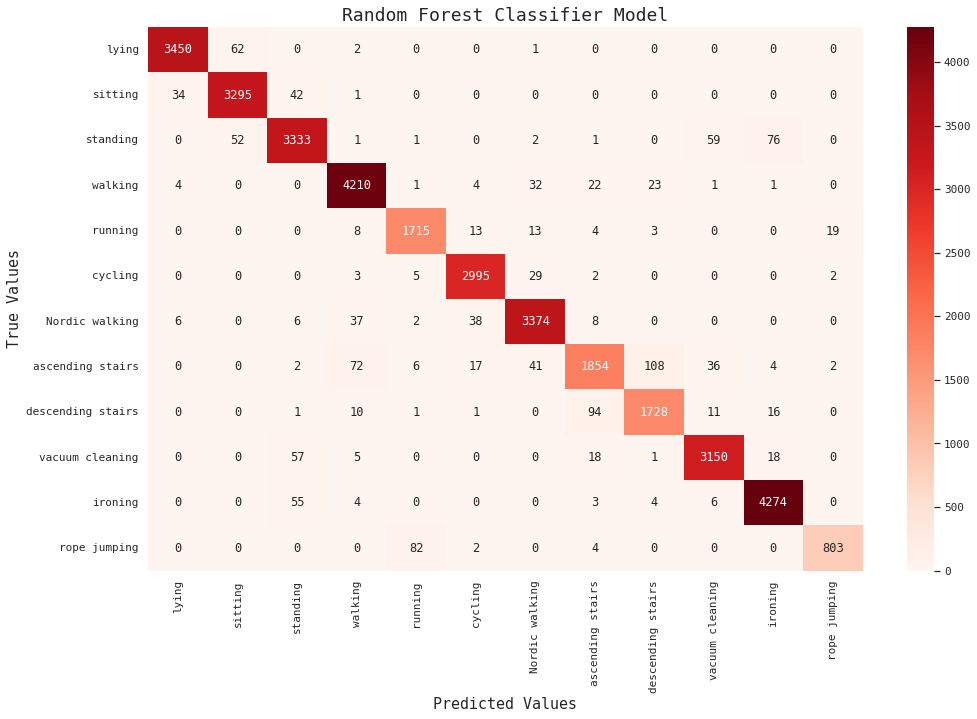

In [96]:
# Displays a confusion matrix of the Random Forest Classifier model
Confusion_Matrix(b_test, RF_Predict, "Random Forest Classifier Model" )

In [97]:
# Displays the metrics of the Random Forest Classifier model 
imp_metric(b_test, RF_Predict)

DAta Model Accuracy is: 96.33% 
Data Model Precision is: 96.01% 
Data Model Recall is: 95.47% 
Data Model F1 Score is: 95.72%


### Random Forest Classifier using only Hand data

In [98]:
# Dropping subjectID and timeStamp columns along with chest and ankle data
PAMAP4 = PAMAP3.drop(["timeStamp","subjectID", "chestAccel", "chestTemp", "chestGyro", "ankleAccel", "ankleTemp", "ankleGyro"], axis=1)

# Drops activityID data from the dataset and creates a new dataframe called PAMAP_Features
PAMAP_Features = PAMAP4.drop(["activityID"], axis=1)

#creates a new dataframe called PAMAP_Target containing activityID data
PAMAP_Target = PAMAP4["activityID"]

# Introducing Robust Scaler
scaler = RobustScaler()

# Splits train and test data
a_train, a_test, b_train, b_test = train_test_split(PAMAP_Features, PAMAP_Target, test_size = 0.2, 
                                                    random_state = 30)
# Scales train dataset
a_train = scaler.fit_transform(a_train)

#Scales test dataset
a_test = scaler.transform(a_test)

In [99]:
#Trains Random Forest Classifier (RF) 
RF.fit(a_train, b_train)

RandomForestClassifier()

In [100]:
# Use Random Forest Classifier to predict activities

RF_Predict = RF.predict(a_test)

print(len(RF_Predict))

print(len(b_test))

print(RF_Predict[0:5])

print(b_test[0:5])

35482
35482
[ 1  4 13  3  6]
840213      1
1064666     4
1265662    13
2528049     3
2759688     6
Name: activityID, dtype: int64


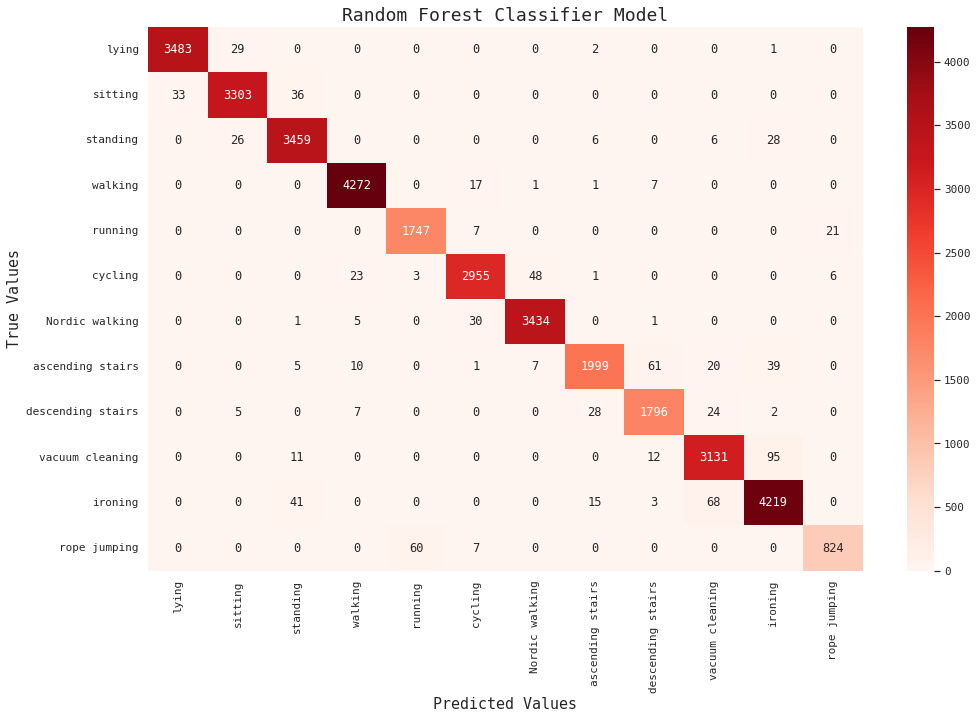

In [101]:
# Displays a confusion matrix of the Random Forest Classifier model
Confusion_Matrix(b_test, RF_Predict, "Random Forest Classifier Model" )

In [102]:
# Displays the metrics of the Random Forest Classifier model 
imp_metric(b_test, RF_Predict)

DAta Model Accuracy is: 97.58% 
Data Model Precision is: 97.4% 
Data Model Recall is: 97.08% 
Data Model F1 Score is: 97.23%


### Random Forest Classifier using only Chest data

In [103]:
# Dropping subjectID and timeStamp columns along with hand and ankle data
PAMAP4 = PAMAP3.drop(["timeStamp","subjectID", "handAccel", "handTemp", "handGyro", "ankleAccel", "ankleTemp", "ankleGyro"], axis=1)

# Drops activityID data from the dataset and creates a new dataframe called PAMAP_Features
PAMAP_Features = PAMAP4.drop(["activityID"], axis=1)

#creates a new dataframe called PAMAP_Target containing activityID data
PAMAP_Target = PAMAP4["activityID"]

# Introducing Robust Scaler
scaler = RobustScaler()

# Splits train and test data
a_train, a_test, b_train, b_test = train_test_split(PAMAP_Features, PAMAP_Target, test_size = 0.2, 
                                                    random_state = 30)
# Scales train dataset
a_train = scaler.fit_transform(a_train)

#Scales test dataset
a_test = scaler.transform(a_test)

In [104]:
#Trains Random Forest Classifier (RF)
RF.fit(a_train, b_train)

RandomForestClassifier()

In [105]:
# Use Random Forest Classifier to predict activities

RF_Predict = RF.predict(a_test)

print(len(RF_Predict))

print(len(b_test))

print(RF_Predict[0:5])

print(b_test[0:5])

35482
35482
[ 1  4 13  3  6]
840213      1
1064666     4
1265662    13
2528049     3
2759688     6
Name: activityID, dtype: int64


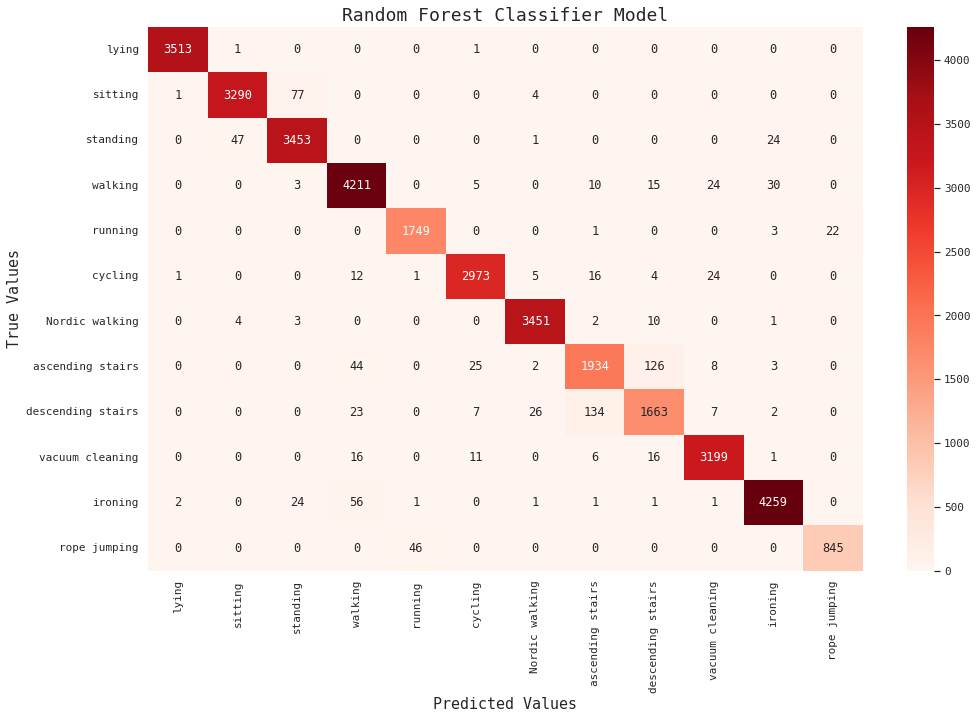

In [106]:
# Displays a confusion matrix of the Random Forest Classifier model
Confusion_Matrix(b_test, RF_Predict, "Random Forest Classifier Model" )

In [107]:
# Displays the metrics of the Random Forest Classifier model 
imp_metric(b_test, RF_Predict)

DAta Model Accuracy is: 97.35% 
Data Model Precision is: 96.92% 
Data Model Recall is: 96.69% 
Data Model F1 Score is: 96.8%


Testing the model against the various variables above provides us with the following insights:

* Removing Acceleration and Angular Velocity did not have a great impact on the accuracy of the model however removing temperarture significantly impacted accuracy.
* Using only data gotten from sensors attached to hand led to a 97.4% accuracy while data gotten from the ankle and chest led to accuracy scores of 96.48% and 96.69% respectively.

 ## 8. Conclusion

The PAMAP2 Physical Activity Monitoring dataset was analyzed in order to identify key insights that could inform the development of hardware and/or software for detecting the activities of an individual. Data cleaning was performed to address any dirty or missing data, and exploratory data analysis was conducted to identify trends and patterns in the data. Hypothesis testing was also carried out to validate these observations. Ultimately, three supervised machine learning models were evaluated, and it was determined that the Random Forest Classifier was the most suitable for predicting activity based on the dataset.

Overall, it was found that the hardware for this device would function best if it were located on the hand, and that heart rate and temperature were the most important attributes for prediction. Acceleration and angular velocity could also be included if desired. However, it is recommended that additional testing be conducted with a larger sample size in order to further improve the accuracy of the predictions.

**Caveat:** 
* For more accurate predictions a dataset with more subjects should be used as this report was based on 9 individuals. 
* The data should be diverse in terms of gender as this report deals with a dataset where 8 of the individuals were male, with only one female.
* Also, this report deals with data from individuals aged between 23 - 32 and so cannot be used to predict results from activities undertaken by individuals outside this age range.

## 9. Reference

* University of Sussex-DSRM Lecture Note
* University of Sussex-DSRM Lab Note
* PerformedActivitiesSummary.pdf, PAMAP2 Dataset Documentation.
* SubjectInformation.pdf, PAMAP2 Dataset Documentation.
* readme.pdf, PAMAP2 Dataset Documentation